In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

from bs4 import BeautifulSoup
import requests

import matplotlib.pyplot as plt

In [2]:
def extract_column_from_header(row):
    """
    This function returns the landing status from the HTML table cell 
    Input: the  element of a table data cell extracts extra row
    """
    if (row.br):
        row.br.extract()
    if row.a:
        row.a.extract()
    if row.sup:
        row.sup.extract()
        
    colunm_name = ' '.join(row.contents)
    
    # Filter the digit and empty names
    if not(colunm_name.strip().isdigit()):
        colunm_name = colunm_name.strip()
        return colunm_name    

# 1. Webscapring ProLivesport

Get from the main result page all the race result accessible on prolivesport

In [3]:
url = "https://www.prolivesport.fr/resultat-classement/"

In [4]:
html = requests.get(url).text

In [5]:
soup = BeautifulSoup(html)

In [6]:
table = soup.find_all(name = "table")[0]

In [7]:
column_names = []

# Apply find_all() function with `th` element on first_launch_table
# Iterate each th element and apply the provided extract_column_from_header() to get a column name
# Append the Non-empty column name (`if name is not None and len(name) > 0`) into a list called column_names
for th in table.find_all("th") :
    a = extract_column_from_header(th)
    if a is not None :
        if len(a) > 0 :
            column_names.append(a)
        else : 
            continue
    else:
        continue

In [8]:
print(column_names)

['Date épreuve', 'Nom épreuve', 'Lieu épreuve', 'Catégorie', 'Catégories']


In [9]:
rows = table.find_all('tr')
result_dict= dict.fromkeys(column_names)

result_dict['Date épreuve'] = []
result_dict['Nom épreuve'] = []
result_dict['Lieu épreuve'] = []
result_dict['Catégorie'] = []
result_dict['Catégories'] = []

# Initialize empty lists to store the table data
for row in rows:
    cols = row.find_all(['td'])  # Find both data cells (td) and header cells (th)
    cols = [col.get_text(strip=True) for col in cols]
    if cols :
        if cols[0]=="" :
            continue
        else :
            date = cols[0]
            result_dict["Date épreuve"].append(date)
    
            name = cols[1]
            result_dict["Nom épreuve"].append(name)
    
            place = cols[2]
            result_dict["Lieu épreuve"].append(place)
    
            cat_race = cols[3]
            result_dict["Catégorie"].append(cat_race)
    
            cat_result = cols[4]
            result_dict["Catégories"].append(cat_result)
    else :
        continue
    

In [10]:
print(rows[:5])

[<tr>
<th>Date épreuve</th>
<th>Nom épreuve</th>
<th>Lieu épreuve</th>
<th>Catégorie</th>
<th>Catégories</th>
</tr>, <tr>
<td>17/09/2023</td>
<td><strong>Swimrun de l'Aa 2023</strong><br/><i></i></td>
<td>Gravelines<br/><br/>Nord / Hauts-de-France</td>
<td>FF TRI -&gt; Swimrun</td>
<td>
<a href="/index.php?chap=event&amp;sub=liveV3&amp;eventId=898" target="_blank">LIVE</a>
</td>
</tr>, <tr><td colspan="5"><hr/></td></tr>, <tr>
<td>17/09/2023</td>
<td><strong>Combiné Triathlon / Duathlon Ardres 2023</strong><br/><i></i></td>
<td>Ardres<br/><br/>Pas-de-Calais / Hauts-de-France</td>
<td>FF TRI -&gt; Triathlon / Duathlon</td>
<td>
<a href="/index.php?chap=event&amp;sub=liveV3&amp;eventId=891" target="_blank">LIVE</a>
</td>
</tr>, <tr><td colspan="5"><hr/></td></tr>]


In [11]:
df = pd.DataFrame({ key:pd.Series(value) for key, value in result_dict.items() })

In [12]:
df

,Date épreuve,Nom épreuve,Lieu épreuve,Catégorie,Catégories
0,17/09/2023,Swimrun de l'Aa 2023,GravelinesNord / Hauts-de-France,FF TRI -> Swimrun,LIVE
1,17/09/2023,Combiné Triathlon / Duathlon Ardres 2023,ArdresPas-de-Calais / Hauts-de-France,FF TRI -> Triathlon / Duathlon,LIVE
2,17/09/2023,Grand Prix Duathlon 2023 - FinaleChampionnats ...,AvallonCentre,FF TRI -> Duathlon,LIVE GRAND PRIX
3,17/09/2023,Boucles dunkerquoises 2023,DunkerqueNord / Hauts-de-France,FFA -> Athlétisme running route,LIVE
4,10/09/2023,Championnats de France ParaTriathlon,Saint-Jean-de-MontsVendée / Pays-de-la-Loire,FF TRI -> Triathlon,LIVE PARA
...,...,...,...,...,...
471,14/06/2014,La ronde Zen & Solidaires en peloton,La Madeleine (Lille),Course à pied - Hors stade,Course jeunesLa ronde Zen & Solidaire - 7KmRel...
472,29/05/2014,Les 4h de Cassel - 1ère édition,Cassel,Cyclisme - VTT,Accès au live
473,18/05/2014,Lille - Hardelot 2014,"Lille, Hardelot",Cyclisme - CycloTourisme,Accès au live
474,24/11/2013,Cyclo-Cross Merville EOLYS,Merville,Cyclisme - Cyclo-Cross,PupilleBenjaminMinimeCadetJuniorElite-Non Elite


Prolivesport contain the result of 476 events

In [13]:
# List of substrings to search for
#my_list_1 = ['Duathlon']
my_list_2 = ["Grand Prix FF TRI Duathlon",'Grand Prix Duathlon',"GrandPrix","Championnats de France des Clubs FFTRI de Division 1"]
# Create a boolean mask to filter rows
#mask_1 = df["Catégorie"].str.contains('|'.join(my_list_1))
mask_2 = df["Nom épreuve"].str.contains('|'.join(my_list_2))

# Use the mask to filter rows in the DataFrame
filtered_df = df[mask_2].reset_index().drop(["index"],axis=1)
filtered_df

,Date épreuve,Nom épreuve,Lieu épreuve,Catégorie,Catégories
0,17/09/2023,Grand Prix Duathlon 2023 - FinaleChampionnats ...,AvallonCentre,FF TRI -> Duathlon,LIVE GRAND PRIX
1,28/05/2023,Grand Prix Duathlon 2023 - Etape 4Championnats...,NoyonOise / Hauts-de-France,FF TRI -> Duathlon,LIVE GRAND PRIX
2,28/05/2023,Grand Prix Duathlon 2023 - Etape 3Championnats...,Mont-Saint-AignanSeine-Maritime / Normandie,FF TRI -> Duathlon,LIVE GRAND PRIX
3,21/05/2023,Grand Prix Duathlon 2023Championnats de France...,CalaisPas-de-Calais / Hauts-de-France,FF TRI -> Duathlon,LIVE
4,24-25/09/2022,Grand Prix FF TRI Duathlon 2022 - Finale - Ava...,AvallonFF TRI / DuarhlonLIVE GRAND PRIX FF TRI,FF TRI / Duarhlon,LIVE GRAND PRIX FF TRI
5,28/08/2022,Grand Prix FF TRI Duathlon 2022 - Etape 4 - Mo...,Mont-Saint-AignanSeine Maritime / Normandie,FF TRI / Duarhlon,LIVE GRAND PRIX FF TRI
6,12/06/2022,Grand Prix Duathlon Les Herbiers 20223e étape ...,Mesnard-La-BarotièresVendée / Pays-de-la-Loire,FF TRI / Duathlon,LIVE CLM
7,15/05/2022,Grand Prix Duathlon Saint Avertin 2022Champion...,Saint AvertinVar / Provence-Alpes-Cote-d'Azur,FF TRI / Triathlon,LIVE GP
8,03/04/2022,Grand Prix FF TRI Duathlon 2022 - Etape 1 - Pa...,ParthenayDeux-Sèvres / Nouvelle-Aquitaine,FF TRI / Duarhlon,LIVE GRAND PRIX FF TRI
9,27/06/2021,Duathlon Parthenay 2021Championnats de France ...,ParthenayDeux-sèvres / Nouvelle-Aquitaine,FF Triathlon / Duathlon,RESULTATS COMPLETS


24 Duathlon grand prix event registered on Prolivesport, almost none of them with the same name format.

We will focus on the period 2018-2023 for the analysis

# 2. Create one dataframe per year 

In [14]:
def race_dataframe (year,event,race,page):  
    url = f"http://www.prolivesport.fr/{year}/{event}/{race}/{page}.html"
    html = requests.get(url).text
    soup = BeautifulSoup(html)
    if soup.find('table') is not None:
        table = soup.find_all(name = "table")[0]

        column_names = []
        for th in table.find_all("th") :
            a = extract_column_from_header(th)
            if a is not None :
                if len(a) > 0 :
                    column_names.append(a)
                else : 
                    continue
            else:
                continue
        result_dict= dict.fromkeys(column_names)
        for col in column_names :
            result_dict[col] = []

        rows = table.find_all('tr')
        for row in rows:
            cols = row.find_all(['td'])  # Find both data cells (td) and header cells (th)
            cols = [col.get_text(strip=True) for col in cols]
            if cols :
                if cols[0]=="" :
                    continue
                else :
                    for index,column in enumerate(column_names):
                        result_dict[column].append(cols[index])
            else :
                continue
        df_test = pd.DataFrame({ key:pd.Series(value) for key, value in result_dict.items() })
        df_test["Event"]=event
        df_test["Race"] = race
    else :
        df_test = pd.DataFrame()
    return df_test

In [15]:
#def set_type(df, time_col):
#    # Convert 'Temps Athlète' columns to time format
#    for col in time_col:
#        try:
#            df[col] = pd.to_datetime(df[col], format='%H:%M:%S').dt.time
#        except ValueError:
#            # Handle rows with inconsistent data, e.g., "P => P"
#            df[col] = pd.to_datetime(df[col].str.split('P', n=1, expand=True)[0].str[:-1], format='%H:%M:%S').dt.time# Set to 'Not-a-Time' for inconsistent rows
#    return df

In [16]:
# Handling DNF in class_etape_df
def DNF_handling(class_df,scratch_df):
    filtered_df = class_df[(class_df['Rang'] == "DNF") ]


    for index, row in filtered_df.iterrows():
        event = row.iloc[6]
        race = row.iloc[7]
        # Use proper parentheses to combine conditions
        max_time = max(scratch_df[(scratch_df['Event'] == event) & (scratch_df['Race'] == race)]["Temps"])
        class_df.at[index, "Temps Athlète 3"] = max_time
    scratch_df.rename(columns={"Temps":"Total"},inplace=True)
    #Drop useless column
    scratch_df = scratch_df.drop(columns=["Dossard"])
    class_df = class_df[class_df['Rang'] != "DNS"]
    return class_df,scratch_df

In [17]:
#Handling missing value mostly bike split
def Missing_handling(scratch_df) :
    
    ### For Cap1 
    scratch_df = scratch_df.replace("00:00:00", np.nan)
    filtered_df = scratch_df[scratch_df['CaP1'].isna()]

    for index, row in filtered_df.iterrows():
        event = row.iloc[6]
        race = row.iloc[7]
        # Use proper parentheses to combine conditions
        mean_time = scratch_df[(scratch_df['Event'] == event) & (scratch_df['Race'] == race)]["CaP1"].mean()
        scratch_df.at[index, "CaP1"] = mean_time

    ### For bike
    filtered_df = scratch_df[scratch_df['Vélo'].isna()]

    for index, row in filtered_df.iterrows():
        event = row.iloc[6]
        race = row.iloc[7]
        # Use proper parentheses to combine conditions
        mean_time = scratch_df[(scratch_df['Event'] == event) & (scratch_df['Race'] == race)]["Vélo"].mean()
        scratch_df.at[index, "Vélo"] = mean_time

    ### for Cap2
    filtered_df = scratch_df[scratch_df['CaP2'].isna()]

    for index, row in filtered_df.iterrows():
        event = row.iloc[6]
        race = row.iloc[7]
        # Use proper parentheses to combine conditions
        mean_time = scratch_df[(scratch_df['Event'] == event) & (scratch_df['Race'] == race)]["CaP2"].mean()
        scratch_df.at[index, "CaP2"] = mean_time
    return scratch_df

In [18]:
def delta_scratch(scratch_df):
    List_column_delta = ["Total", "CaP1", "Vélo", "Vélo Cum.", "CaP2"]

    for col in List_column_delta:
        if pd.api.types.is_timedelta64_dtype(scratch_df[col]):
            # Calculate the minimum time for each unique combination of "Race" and "Event"
            scratch_df["Min Time"] = scratch_df.groupby(["Race", "Event"])[col].transform("min")

            # Calculate the "Delta time to fastest" column
            scratch_df[f"Gap to 1st {col} (s)"] = (scratch_df[col] - scratch_df["Min Time"]).dt.total_seconds()

            scratch_df = scratch_df.drop(columns=["Min Time"])
        else : 
            scratch_df[col] = pd.to_timedelta(scratch_df[col].astype(str))
            scratch_df.dtypes
            # Calculate the minimum time for each unique combination of "Race" and "Event"
            scratch_df["Min Time"] = scratch_df.groupby(["Race", "Event"])[col].transform("min")

            # Calculate the "Delta time to fastest" column
            scratch_df[f"Gap to 1st {col} (s)"] = (scratch_df[col] - scratch_df["Min Time"]).dt.total_seconds()

            scratch_df = scratch_df.drop(columns=["Min Time"])

    scratch_df['Gap to 1st CaP1 (s)'] = scratch_df['Gap to 1st CaP1 (s)'].astype(float)
    scratch_df['Gap to 1st Vélo Cum. (s)'] = scratch_df['Gap to 1st Vélo Cum. (s)'].astype(float)
    scratch_df['Gap to 1st Total (s)'] = scratch_df['Gap to 1st Total (s)'].astype(float)
    
    return scratch_df




In [19]:
#Add delta time to 3rd rider of team compare to first of race for class_etape_df_2023
def delta_3rd(class_etape_df):
    class_etape_df["Temps Athlète 3"] = pd.to_timedelta(class_etape_df["Temps Athlète 3"])
    class_etape_df["Temps Athlète 1"] = pd.to_timedelta(class_etape_df["Temps Athlète 1"])

    # Calculate the minimum time for each unique combination of "Race" and "Event"
    class_etape_df["Min Time"] = class_etape_df.groupby(["Race", "Event"])["Temps Athlète 1"].transform("min")

    # Calculate the "Delta time to fastest" column
    class_etape_df[f"Gap to 1st for 3rd athlete per team (s)"] = (class_etape_df["Temps Athlète 3"] - class_etape_df["Min Time"]).dt.total_seconds()

    class_etape_df = class_etape_df.drop(columns=["Min Time"])
    class_etape_df['Gap to 1st for 3rd athlete per team (s)'] = class_etape_df['Gap to 1st for 3rd athlete per team (s)'].astype(float)
    return class_etape_df

## 2.1. Create 2023 

In [21]:
#Let's find the data for 2023 by creating a loop
List_event = ["parthenay","calais","mont-saint-aignan","noyon","avallon"]
List_race = ["D1F","D2F","D1H","D2H"]
List_page = ["classement-etape","scratch"]
year = "live-grand-prix-duathlon-2023"
class_etape_df_2023 = pd.DataFrame()
scratch_df_2023 = pd.DataFrame()

for page in List_page :
    if page == "classement-etape":
        for race in List_race:
            df_race = pd.DataFrame()
            for event in List_event :
                df = race_dataframe(year,event, race, page)
                if df.empty :
                    continue
                else : 
                    df_race = pd.concat([df_race,df])
            class_etape_df_2023 = pd.concat([class_etape_df_2023,df_race])
    else :
        for race in List_race:
            df_race = pd.DataFrame()
            for event in List_event :
                df = race_dataframe(year,event, race, page)
                if df.empty :
                    continue
                else : 
                    df_race = pd.concat([df_race,df])
            scratch_df_2023 = pd.concat([scratch_df_2023,df_race])
            
for col in ["CaP1","Vélo","Vélo Cum.","CaP2"]:
        scratch_df_2023[col] = scratch_df_2023[col].str.split(' ',n=2,expand=True)[0]

for col in ["Athlète 1","Athlète 2","Athlète 3"]:
    class_etape_df_2023[f"Temps {col}"] = class_etape_df_2023[col].str.split('(', n=2, expand=True)[1].str[:-1]
    class_etape_df_2023[col] = class_etape_df_2023[col].str.split('(', n=2, expand=True)[0]
    


In [22]:
#Calais was a team format so we can't use this event to compare with other
scratch_df_2023 = scratch_df_2023[scratch_df_2023['Event'] != 'calais'].reset_index().drop(columns=["index"])
class_etape_df_2023 = class_etape_df_2023[class_etape_df_2023['Event'] != 'calais'].reset_index().drop(columns=["index"])
#Adjust manually a row Mael Gouret mont saint aignan, last lap time is in T2 
scratch_df_2023.at[625,'Vélo']= "00:27:53"
scratch_df_2023.at[625,'Vélo Cum.']= "00:42:55"
scratch_df_2023.at[625,'#2']= "00:00:38"

In [23]:
class_etape_df_2023, scratch_df_2023 = DNF_handling(class_etape_df_2023, scratch_df_2023)

In [24]:
scratch_df_2023 = Missing_handling(scratch_df_2023)

In [25]:
# Define the condition
condition = pd.to_timedelta(scratch_df_2023['CaP1']) < pd.to_timedelta('00:12:00')
print(condition.sum())
# Locate the rows that meet the condition and update the 'Cap1' column
scratch_df_2023.loc[condition,'CaP1'] = pd.to_timedelta(scratch_df_2023.loc[condition,'CaP1']) + (pd.to_timedelta(scratch_df_2023.loc[condition,'#1'])) - pd.to_timedelta('00:00:40')

9


In [26]:
scratch_df_2023 = delta_scratch(scratch_df_2023)

In [27]:
class_etape_df_2023 = delta_3rd(class_etape_df_2023)

In [28]:
condition = scratch_df_2023['Event'].isin(["parthenay", "mont-saint-aignan", "noyon","avallon"]) | scratch_df_2023['Race'].isin(["D2F", "D2H", "D1F"])
condition_2 = (scratch_df_2023["Race"] == "D1H") & (scratch_df_2023["Event"].isin(["noyon","avallon"]))

# Update the 'Gap to 1st CaP1 (s)' column for rows meeting condition
scratch_df_2023.loc[condition, 'Gap to 1st CaP1 (s)'] = round(scratch_df_2023.loc[condition, 'Gap to 1st CaP1 (s)'] / 5,2)
scratch_df_2023.loc[condition, 'Gap to 1st Vélo (s)'] = round(scratch_df_2023.loc[condition, 'Gap to 1st Vélo (s)'] / 20,2)
scratch_df_2023.loc[condition, 'Gap to 1st CaP2 (s)'] = round(scratch_df_2023.loc[condition, 'Gap to 1st CaP2 (s)'] / 2.5,2)
scratch_df_2023.loc[condition, 'Gap to 1st Total (s)'] = round(scratch_df_2023.loc[condition, 'Gap to 1st Total (s)'] / 27.5,2)

# Update the 'Gap to 1st CaP1 (s)' column for rows meeting condition_2
scratch_df_2023.loc[condition_2, 'Gap to 1st CaP1 (s)'] = round(scratch_df_2023.loc[condition_2, 'Gap to 1st CaP1 (s)'] / 5,2)
scratch_df_2023.loc[condition_2, 'Gap to 1st Vélo (s)'] = round(scratch_df_2023.loc[condition_2, 'Gap to 1st Vélo (s)'] / 30,2)
scratch_df_2023.loc[condition_2, 'Gap to 1st CaP2 (s)'] = round(scratch_df_2023.loc[condition_2, 'Gap to 1st CaP2 (s)'] / 5,2)
scratch_df_2023.loc[condition_2, 'Gap to 1st Total (s)'] = round(scratch_df_2023.loc[condition_2, 'Gap to 1st Total (s)'] / 40,2)

In [29]:
scratch_df_2023

,Rang,Athlète,Nation,Cat.,Club,Total,CaP1,#1,Vélo,Vélo Cum.,...,CaP2,U23,A.S.,Event,Race,Gap to 1st Total (s),Gap to 1st CaP1 (s),Gap to 1st Vélo (s),Gap to 1st Vélo Cum. (s),Gap to 1st CaP2 (s)
0,1.,MARION LEGRAND,FRA,S3 (1e),LES TRITONS MELDOIS,0 days 01:00:39,0 days 00:17:03,00:00:37,0 days 00:33:38,0 days 00:51:17,...,0 days 00:08:52,,,parthenay,D1F,0.00,0.2,1.40,0.0,0.0
1,2.,MARION LE GOFF,FRA,S2 (1e),PONTIVY TRIATHLON,0 days 01:00:50,0 days 00:17:02,00:00:37,0 days 00:33:42,0 days 00:51:20,...,0 days 00:08:57,,,parthenay,D1F,0.40,0.0,1.60,3.0,2.0
2,3.,MAURINE RICOUR,BEL,S3 (2e),LES TRITONS MELDOIS,0 days 01:00:53,0 days 00:17:03,00:00:39,0 days 00:33:39,0 days 00:51:21,...,0 days 00:09:01,,,parthenay,D1F,0.51,0.2,1.45,4.0,3.6
3,4.,EMMA WASSER,FRA,S1 (1e),A.S.P.T.T. STRASBOURG TRI,0 days 01:00:56,0 days 00:17:32,00:00:38,0 days 00:33:10,0 days 00:51:18,...,0 days 00:09:07,U23,,parthenay,D1F,0.62,6.0,0.00,1.0,6.0
4,5.,CLAUDIA KELSALL,GBR,S2 (2e),LES TRITONS MELDOIS,0 days 01:01:27,0 days 00:17:04,00:00:39,0 days 00:33:40,0 days 00:51:22,...,0 days 00:09:32,,,parthenay,D1F,1.75,0.4,1.50,5.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,75.,RAPHAEL BENEZIT,FRA,M3 (1e),LE PUY-EN-VELAY TRIATHLON,0 days 01:07:01,0 days 00:16:42,00:00:56,0 days 00:38:17,0 days 00:55:54,...,0 days 00:09:51,,,avallon,D2H,21.35,26.8,20.95,492.0,48.8
986,76.,MEIRE BENEZET,FRA,S1 (22e),STADE FRANCAIS,0 days 01:07:36,0 days 00:16:49,00:00:53,0 days 00:37:57,0 days 00:55:38,...,0 days 00:10:45,U23,*,avallon,D2H,22.62,28.2,19.95,476.0,70.4
987,77.,ROBIN BISTEUR,FRA,S2 (26e),STADE FRANCAIS,0 days 01:07:57,0 days 00:15:57,00:00:54,0 days 00:39:31,0 days 00:56:21,...,0 days 00:10:13,,,avallon,D2H,23.38,17.8,24.65,519.0,57.6
988,78.,THEO MARGERIT,FRA,S2 (27e),VALLEE DE MONTMORENCY TRIATHLON,0 days 01:08:48,0 days 00:18:03,00:00:56,0 days 00:37:17,0 days 00:56:16,...,0 days 00:11:17,,,avallon,D2H,25.24,43.0,17.95,514.0,83.2


In [30]:
class_etape_df_2023

,Rang,Club,Athlète 1,Athlète 2,Athlète 3,TOTAL,Event,Race,Temps Athlète 1,Temps Athlète 2,Temps Athlète 3,Gap to 1st for 3rd athlete per team (s)
0,1.,LES TRITONS MELDOIS,1. LEGRAND MARION,3. RICOUR MAURINE,5. KELSALL CLAUDIA,9 pts,parthenay,D1F,0 days 01:00:39,01:00:53,0 days 01:01:27,48.0
1,2.,A.S.P.T.T. 36 SPORTS NATURE,6. ROSE LUCIE,14. COUTANT EVA,25. MONMARTEAU SABRINA,45 pts,parthenay,D1F,0 days 01:01:41,01:02:22,0 days 01:03:24,165.0
2,3.,LYS CALAIS TRIATHLON,8. NIEUWENHUIJSEN KARIN,17. BROWN RACHEL ELISABETH,26. DELVINCOURT JOSEPHINE,51 pts,parthenay,D1F,0 days 01:01:55,01:02:35,0 days 01:03:28,169.0
3,4.,PONTIVY TRIATHLON,2. LE GOFF MARION,19. LE GUEN CAMILLE,37. WANHERDRICK ELODIE,58 pts,parthenay,D1F,0 days 01:00:50,01:03:07,0 days 01:05:40,301.0
4,5.,COTE D OPALE TRIATHLON CALAIS SAINT-OMER,15. HILLER ELEONORE,21. VALLOIS LAURA,23. ROLIN CAPUCINE,59 pts,parthenay,D1F,0 days 01:02:30,01:03:10,0 days 01:03:16,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...
217,12.,TRI VAL DE GRAY,43. OGIER MATTHIEU,46. SOL TIMOTHE,48. MOUSSAOUI SOFIANE,137 pts,avallon,D2H,0 days 01:01:40,01:01:55,0 days 01:02:34,320.0
218,13.,LE MANS TRIATHLON,34. EXMELIN ANTOINE,44. BELLOT JEANLOUP,64. PAVARD THOMAS,142 pts,avallon,D2H,0 days 01:00:54,01:01:41,0 days 01:05:44,510.0
219,14.,VALLEE DE MONTMORENCY TRIATHLON,32. GUICHARD MARTIN,58. BOVE PIERRE OLIVIER,61. ORHAN ALEXANDRE,151 pts,avallon,D2H,0 days 01:00:53,01:04:36,0 days 01:05:14,480.0
220,15.,CLERMONT TRIATHLON,55. SCHAAL FLORENT,60. JOURDAN JUSTIN,63. BERTRAND MATTEO,178 pts,avallon,D2H,0 days 01:04:06,01:04:48,0 days 01:05:39,505.0


## 2.1. Create 2022

In [33]:
#Let's find the data for 2022 by creating a loop
List_event = ["parthenay","st-avertin","mesnard-la-barotiere","mont-saint-aignan","avallon"]
List_race = ["D1F","D2F","D1H","D2H"]
List_page = ["classement-etape","scratch"]
year = "live-grand-prix-duathlon-2022"
class_etape_df_2022 = pd.DataFrame()
scratch_df_2022 = pd.DataFrame()

for page in List_page :
    if page == "classement-etape":
        for race in List_race:
            df_race = pd.DataFrame()
            for event in List_event :
                df = race_dataframe(year,event, race, page)
                if df.empty :
                    continue
                else : 
                    df_race = pd.concat([df_race,df])
            class_etape_df_2022 = pd.concat([class_etape_df_2022,df_race])
    else :
        for race in List_race:
            df_race = pd.DataFrame()
            for event in List_event :
                df = race_dataframe(year,event, race, page)
                if df.empty :
                    continue
                else : 
                    df_race = pd.concat([df_race,df])
            scratch_df_2022 = pd.concat([scratch_df_2022,df_race])
            
for col in ["CaP1","Vélo","Vélo Cum.","CaP2"]:
        scratch_df_2022[col] = scratch_df_2022[col].str.split(' ',n=2,expand=True)[0]

for col in ["Athlète 1","Athlète 2","Athlète 3"]:
    class_etape_df_2022[f"Temps {col}"] = class_etape_df_2022[col].str.split('(', n=2, expand=True)[1].str[:-1]
    class_etape_df_2022[col] = class_etape_df_2022[col].str.split('(', n=2, expand=True)[0]
    
#Mesnard la barotière was a time trial and st avertin a multi-transition race so we can't use them to compare with other
scratch_df_2022 = scratch_df_2022[scratch_df_2022['Event'] != 'mesnard-la-barotiere']
class_etape_df_2022 = class_etape_df_2022[class_etape_df_2022['Event'] != 'mesnard-la-barotiere']

scratch_df_2022 = scratch_df_2022[scratch_df_2022['Event'] != 'st-avertin']
class_etape_df_2022 = class_etape_df_2022[class_etape_df_2022['Event'] != 'st-avertin']

scratch_df_2022 = scratch_df_2022.drop(columns=["Velo1", 'Velo2', 'CaP3', 'Velo'])



In [34]:
class_etape_df_2022, scratch_df_2022 = DNF_handling(class_etape_df_2022, scratch_df_2022)

In [35]:
scratch_df_2022 = Missing_handling(scratch_df_2022)

In [36]:
scratch_df_2022 = delta_scratch(scratch_df_2022)

In [37]:
class_etape_df_2022 = delta_3rd(class_etape_df_2022)

In [38]:
condition = scratch_df_2022['Event'].isin(["avallon", "mont-saint-aignan", "parthenay"]) | scratch_df_2022['Race'].isin(["D2F", "D2H", "D1F"])
condition_2 = (scratch_df_2022["Race"] == "D1H") & (scratch_df_2022["Event"] == "avallon")

# Update the 'Gap to 1st CaP1 (s)' column for rows meeting condition
scratch_df_2022.loc[condition, 'Gap to 1st CaP1 (s)'] = round(scratch_df_2022.loc[condition, 'Gap to 1st CaP1 (s)'] / 5,2)
scratch_df_2022.loc[condition, 'Gap to 1st Vélo (s)'] = round(scratch_df_2022.loc[condition, 'Gap to 1st Vélo (s)'] / 20,2)
scratch_df_2022.loc[condition, 'Gap to 1st CaP2 (s)'] = round(scratch_df_2022.loc[condition, 'Gap to 1st CaP2 (s)'] / 2.5,2)
scratch_df_2022.loc[condition, 'Gap to 1st Total (s)'] = round(scratch_df_2022.loc[condition, 'Gap to 1st Total (s)'] / 27.5,2)

# Update the 'Gap to 1st CaP1 (s)' column for rows meeting condition_2
scratch_df_2022.loc[condition_2, 'Gap to 1st CaP1 (s)'] = round(scratch_df_2022.loc[condition_2, 'Gap to 1st CaP1 (s)'] / 5,2)
scratch_df_2022.loc[condition_2, 'Gap to 1st Vélo (s)'] = round(scratch_df_2022.loc[condition_2, 'Gap to 1st Vélo (s)'] / 30,2)
scratch_df_2022.loc[condition_2, 'Gap to 1st CaP2 (s)'] = round(scratch_df_2022.loc[condition_2, 'Gap to 1st CaP2 (s)'] / 5,2)
scratch_df_2022.loc[condition_2, 'Gap to 1st Total (s)'] = round(scratch_df_2022.loc[condition_2, 'Gap to 1st Total (s)'] / 40,2)

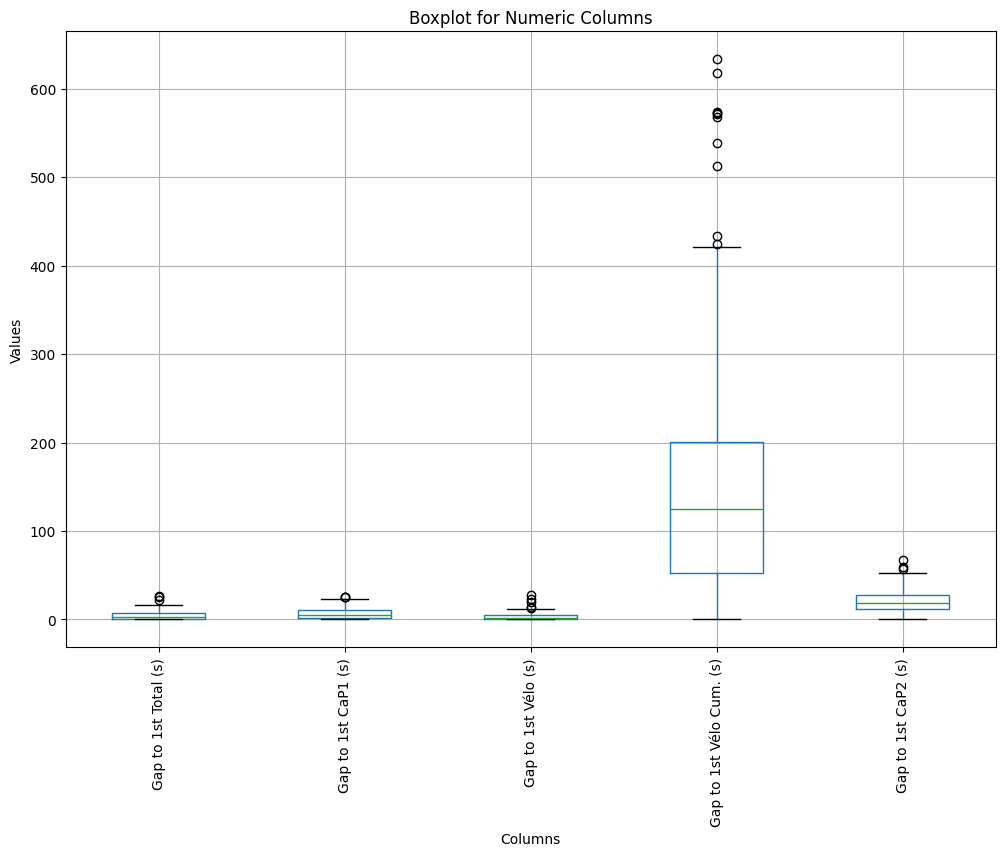

,Total,CaP1,Vélo,Vélo Cum.,CaP2,Gap to 1st Total (s),Gap to 1st CaP1 (s),Gap to 1st Vélo (s),Gap to 1st Vélo Cum. (s),Gap to 1st CaP2 (s)
count,232,229,215,227,229,232.000000,229.000000,215.000000,227.000000,229.000000
mean,0 days 01:05:08.349137931,0 days 00:15:23.637554585,0 days 00:36:54.409302325,0 days 00:53:00.088105726,0 days 00:11:27.755458515,4.405733,6.711266,3.440279,150.691630,19.861659
std,0 days 00:15:01.221351940,0 days 00:00:33.216786407,0 days 00:09:39.214663213,0 days 00:09:59.454000234,0 days 00:05:01.062360982,4.840016,5.945849,4.108501,135.066362,11.727636
min,0 days 00:51:41,0 days 00:14:21,0 days 00:28:13,0 days 00:44:03,0 days 00:06:49,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0 days 00:54:06.500000,0 days 00:15:00,0 days 00:29:41,0 days 00:45:37,0 days 00:07:52,0.415000,1.720000,0.390000,52.000000,11.280000
50%,0 days 00:56:43,0 days 00:15:25,0 days 00:31:15,0 days 00:47:41,0 days 00:08:33,3.035000,5.400000,1.750000,125.000000,18.160000
75%,0 days 01:23:35.500000,0 days 00:15:47,0 days 00:48:58.500000,0 days 01:05:10,0 days 00:17:34,7.215000,10.400000,5.175000,200.500000,27.600000
max,0 days 01:37:59,0 days 00:16:48,0 days 00:56:19,0 days 01:13:38,0 days 00:24:04,26.250000,25.800000,27.900000,633.000000,67.200000


In [39]:
numeric_columns = scratch_df_2022.select_dtypes(include=['number'])[scratch_df_2022['Race'] == "D1H"]
plt.figure(figsize=(12, 8))
numeric_columns.boxplot(rot=90)
plt.title("Boxplot for Numeric Columns")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.show()
numeric_columns.describe()

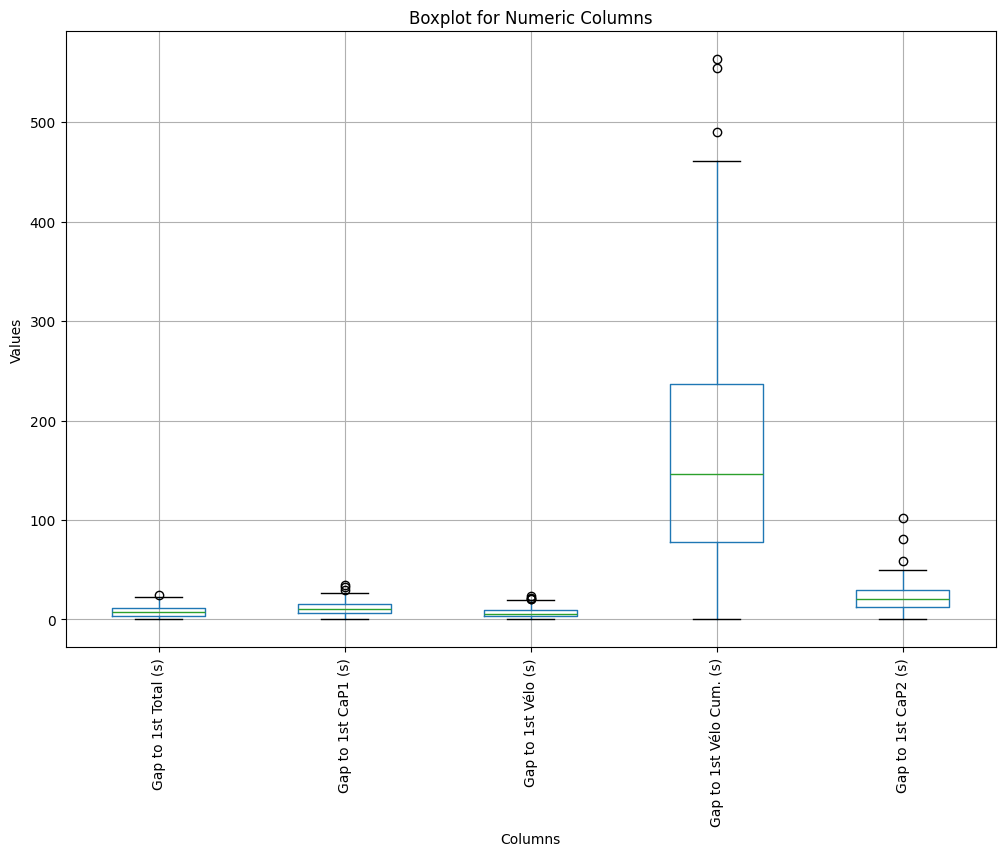

In [40]:
numeric_columns = scratch_df_2022.select_dtypes(include=['number'])[scratch_df_2022['Race'] == "D2H"]
plt.figure(figsize=(12, 8))
numeric_columns.boxplot(rot=90)
plt.title("Boxplot for Numeric Columns")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.show()

In [41]:
#race_dynamics_plot(scratch_df_2022,"D1H")

In [42]:
scratch_df_2022

,Rang,Athlète,Nation,Cat.,Club,Total,CaP1,#1,Vélo,Vélo Cum.,...,CaP2,U23,A.S.,Event,Race,Gap to 1st Total (s),Gap to 1st CaP1 (s),Gap to 1st Vélo (s),Gap to 1st Vélo Cum. (s),Gap to 1st CaP2 (s)
0,1.,MARION LEGRAND,FRA,S3 (1e),STADE FRANCAIS,0 days 01:00:59,0 days 00:16:59,00:00:23,0 days 00:34:15,0 days 00:51:36,...,0 days 00:09:01,,,parthenay,D1F,0.00,0.0,0.00,0.0,1.2
1,2.,JOSELYN DANIELY BREA ABREU,VEN,S2 (1e),MONTLUCON TRIATHLON,0 days 01:02:25,0 days 00:16:59,00:00:22,0 days 00:35:39,0 days 00:53:00,...,0 days 00:08:58,,,parthenay,D1F,3.13,0.0,4.20,84.0,0.0
2,3.,MARION LE GOFF,FRA,S2 (2e),PONTIVY TRIATHLON,0 days 01:02:32,0 days 00:16:59,00:00:24,0 days 00:35:41,0 days 00:53:02,...,0 days 00:09:03,,,parthenay,D1F,3.38,0.0,4.30,86.0,2.0
3,4.,GARANCE BLAUT,FRA,S3 (2e),STADE FRANCAIS,0 days 01:02:55,0 days 00:17:35,00:00:32,0 days 00:35:11,0 days 00:53:17,...,0 days 00:09:07,,,parthenay,D1F,4.22,7.2,2.80,101.0,3.6
4,5.,MAURINE RICOUR,BEL,S3 (3e),LES TRITONS MELDOIS,0 days 01:03:01,0 days 00:17:12,00:00:33,0 days 00:35:34,0 days 00:53:18,...,0 days 00:09:12,,,parthenay,D1F,4.44,2.6,3.95,102.0,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,60.,BENJAMIN FEQUANT,FRA,M1 (2e),A.S.P.T.T. ANGERS,0 days 01:06:24,0 days 00:16:59,00:00:54,0 days 00:38:14,0 days 00:56:06,...,0 days 00:09:20,,,avallon,D2H,19.38,25.2,18.95,459.0,26.8
60,61.,HENRI DECAUCHY,FRA,S2 (20e),STADE FRANCAIS,0 days 01:06:27,0 days 00:17:00,00:00:59,0 days 00:37:41,0 days 00:55:39,...,0 days 00:09:30,,,avallon,D2H,19.49,25.4,17.30,432.0,30.8
61,62.,BAPTISTE LAPORTE,FRA,S1 (16e),LOMME NATATION TRIATHLON,0 days 01:06:33,0 days 00:16:21,00:00:55,0 days 00:38:52,0 days 00:56:08,...,0 days 00:09:30,U23,,avallon,D2H,19.71,17.6,20.85,461.0,30.8
62,63.,FLORIMOND NAULLEAU,FRA,S4 (1e),A.S.P.T.T. ANGERS,0 days 01:08:01,0 days 00:16:45,00:01:11,0 days 00:39:55,0 days 00:57:50,...,0 days 00:09:03,,,avallon,D2H,22.91,22.4,24.00,563.0,20.0


In [43]:
class_etape_df_2022

,Rang,Club,Athlète 1,Athlète 2,Athlète 3,TOTAL,Event,Race,Temps Athlète 1,Temps Athlète 2,Temps Athlète 3,Gap to 1st for 3rd athlete per team (s)
0,1.,STADE FRANCAIS,1. LEGRAND MARION,4. BLAUT GARANCE,8. CHUBERRE DODE JULIE,13 pts,parthenay,D1F,0 days 01:00:59,01:02:55,0 days 01:03:59,180.0
1,2.,LES TRITONS MELDOIS,5. RICOUR MAURINE,6. LANG LUCIE,12. SCHOOT UITERKAMP ANN,23 pts,parthenay,D1F,0 days 01:03:01,01:03:30,0 days 01:04:41,222.0
2,3.,U.S. PALAISEAU TRIATHLON,7. ALLAN NICOLE,13. ROYER LOUISE,16. LE BIHAN LOANNE,36 pts,parthenay,D1F,0 days 01:03:38,01:04:49,0 days 01:04:56,237.0
3,4.,MONTLUCON TRIATHLON,2. BREA ABREU JOSELYN DANIELY,15. BEJARANO SONIA,20. COSTE MANON,37 pts,parthenay,D1F,0 days 01:02:25,01:04:54,0 days 01:05:01,242.0
4,5.,PONTIVY TRIATHLON,3. LE GOFF MARION,14. FRANCES GEMMA,26. PRIGENT ROZENN,43 pts,parthenay,D1F,0 days 01:02:32,01:04:51,0 days 01:05:20,261.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11,12.,TRIATHLON CLUB NANTAIS,34. TOURNERIE MARC ANDRE,40. BALITRAND FLORIAN,54. DANIEL ARTHUR,128 pts,avallon,D2H,0 days 01:01:59,01:02:41,0 days 01:05:58,507.0
12,13.,LOMME NATATION TRIATHLON,42. PELOUAS MARTIN,44. FREDERIC ADRIEN,58. LAPORTE BAPTISTE,144 pts,avallon,D2H,0 days 01:02:51,01:03:02,0 days 01:06:33,542.0
13,14.,VITTEL TRIATHLON,37. SOL TIMOTHE,53. MARIETTE EMILIEN,60. FISCHER LOIS,150 pts,avallon,D2H,0 days 01:02:16,01:05:53,0 days 01:08:46,675.0
14,DNF,TRI VAL DE GRAY,27. GOMES DOS SANTOS ESTEBAN,36. MAILLOT NICOLAS,0.,,avallon,D2H,0 days 01:01:06,01:02:10,0 days 01:08:46,675.0


## 2.4. Create 2021

### 2.4.1. Create Parthenay 2021

In [44]:
#For the year 2018 to 2021 we will use the xlsx file from the fftri website to create our data frame
# Define filepath (use an absolute or relative path as appropriate)
filepath = r"Data\2021_PARTHENAY.xlsx"

# Load Excel file using Pandas
f = pd.ExcelFile(filepath)

# Define empty DataFrames
scratch_df_2021_Parthenay = pd.DataFrame()
class_etape_df_2021_Parthenay = pd.DataFrame()
event="parthenay"
# Iterate through each worksheet
for sheet_name in f.sheet_names:
    if "D1 Femmes" in sheet_name:
        race_category = "D1F"
    elif "D1 Hommes" in sheet_name:
        race_category = "D1H"
    elif "D2 Femmes" in sheet_name:
        race_category = "D2F"
    elif "D2 Hommes" in sheet_name:
        race_category = "D2H"
    if "Scratch" in sheet_name:
        # Read data from sheets containing "Scratch" and start from row 10 (with header in row 9)
        df = pd.read_excel(filepath, sheet_name=sheet_name, skiprows=range(8))
        df['Race'] = race_category
        df['Event'] = event
        scratch_df_2021_Parthenay = pd.concat([scratch_df_2021_Parthenay,df])
    else:
        # Read data from other sheets and start from row 10 (with header in row 9)
        df = pd.read_excel(filepath, sheet_name=sheet_name, skiprows=range(8))
        df['Race'] = race_category
        df['Event'] = event
        class_etape_df_2021_Parthenay = pd.concat([class_etape_df_2021_Parthenay,df])
scratch_df_2021_Parthenay.rename(columns={"Global":"Total","Vélo Cum":"Vélo Cum."},inplace=True)
scratch_df_2021_Parthenay["Athlète"] = [f"{scratch_df_2021_Parthenay.iloc[i]['Prénom']} {scratch_df_2021_Parthenay.iloc[i]['Nom']}" for i in range(len(scratch_df_2021_Parthenay))]
scratch_df_2021_Parthenay = scratch_df_2021_Parthenay.drop(columns=["N°","N° licence","Prénom","Nom"])
class_etape_df_2021_Parthenay.rename(columns={"Tps #1":"Temps Athlète 1","Tps #2":"Temps Athlète 2","Tps #3":"Temps Athlète 3"},inplace=True)
class_etape_df_2021_Parthenay = class_etape_df_2021_Parthenay.drop(columns=["Rg #1","Rg #2","Rg #3"])

time_columns = ['CaP1', 'Vélo',"Vélo Cum.","CaP2"]

# Convert the time columns to timedelta objects
for col in time_columns:
    scratch_df_2021_Parthenay[col] = pd.to_timedelta(scratch_df_2021_Parthenay[col].astype(str))
    
time_columns = ['Temps Athlète 1', 'Temps Athlète 2',"Temps Athlète 3"]

# Convert the time columns to timedelta objects
for col in time_columns:
    class_etape_df_2021_Parthenay[col] = pd.to_timedelta(class_etape_df_2021_Parthenay[col].astype(str))

In [45]:
scratch_df_2021_Parthenay

,Rang,A.S.,Péna,Nat,Rg / Cat,Cat,U23,Club,Total,CaP1,#1,Vélo,Vélo Cum.,#2,CaP2,Race,Event,Athlète
0,1,NaN,NaN,FRA,1,S3,NaN,STADE FRANCAIS,01:00:59,0 days 00:16:59,00:00:23,0 days 00:34:15,0 days 00:51:36,00:00:22,0 days 00:09:01,D1F,parthenay,MARION LEGRAND
1,2,NaN,NaN,VEN,1,S2,NaN,MONTLUCON TRIATHLON,01:02:25,0 days 00:16:59,00:00:22,0 days 00:35:39,0 days 00:53:00,00:00:28,0 days 00:08:58,D1F,parthenay,JOSELYN DANIELY BREA ABREU
2,3,NaN,NaN,FRA,2,S2,NaN,PONTIVY TRIATHLON,01:02:32,0 days 00:16:59,00:00:24,0 days 00:35:41,0 days 00:53:02,00:00:28,0 days 00:09:03,D1F,parthenay,MARION LE GOFF
3,4,NaN,NaN,FRA,2,S3,NaN,STADE FRANCAIS,01:02:55,0 days 00:17:35,00:00:32,0 days 00:35:11,0 days 00:53:17,00:00:31,0 days 00:09:07,D1F,parthenay,GARANCE BLAUT
4,5,NaN,NaN,BEL,3,S3,NaN,LES TRITONS MELDOIS,01:03:01,0 days 00:17:12,00:00:33,0 days 00:35:34,0 days 00:53:18,00:00:32,0 days 00:09:12,D1F,parthenay,MAURINE RICOUR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,68,NaN,NaN,FRA,2,M1,NaN,VALLEE DE MONTMORENCY TRIATHLON,01:03:33,0 days 00:17:38,00:00:24,0 days 00:36:02,0 days 00:54:03,00:00:27,0 days 00:09:04,D2H,parthenay,JEAN MARIE MITH
68,69,NaN,NaN,FRA,1,M3,NaN,LE PUY-EN-VELAY TRIATHLON,01:03:34,0 days 00:16:56,00:00:29,0 days 00:36:43,0 days 00:54:07,00:00:38,0 days 00:08:50,D2H,parthenay,RAPHAEL BENEZIT
69,70,NaN,NaN,FRA,19,S2,NaN,A.S.P.T.T. ANGERS,01:03:52,0 days 00:16:55,00:00:26,0 days 00:37:46,0 days 00:55:05,00:00:32,0 days 00:08:15,D2H,parthenay,JOHAN BRICHET
70,71,NaN,NaN,FRA,20,S2,NaN,CREUSOT TRIATHLON,01:04:24,0 days 00:17:11,00:00:29,0 days 00:37:54,0 days 00:55:33,00:00:29,0 days 00:08:23,D2H,parthenay,JEREMIE BRETIGNY


In [46]:
class_etape_df_2021_Parthenay

,Rang,Club,Pts,Athlète #1,Temps Athlète 1,Athlète #2,Temps Athlète 2,Athlète #3,Temps Athlète 3,Race,Event
0,1,LES TRITONS MELDOIS,14.0,LANG LUCIE,0 days 01:03:19,GAY PAGEON MARION,0 days 01:03:49,ZIEMONS KRISTINA,0 days 01:03:52,D1F,parthenay
1,2,LA GRANDE MOTTE TRIATHLON,38.0,LAURENT CAMILLE,0 days 01:03:40,HEBRARD MAYA,0 days 01:04:04,LAVAUX JUSTINE,0 days 01:06:19,D1F,parthenay
2,3,PONTIVY TRIATHLON,50.0,LE GOFF MARION,0 days 01:03:34,BAZIRE MEGHAN,0 days 01:03:54,LALET PAULINE,0 days 01:07:28,D1F,parthenay
3,4,CÔTE D OPALE TRIATHLON CALAIS SAINT-OMER,54.0,ROLIN CAPUCINE,0 days 01:03:47,LUCAS RAPHAELLE,0 days 01:04:12,MUDES FANNY,0 days 01:06:57,D1F,parthenay
4,5,U.S. PALAISEAU TRIATHLON,58.0,ROYER LOUISE,0 days 01:03:44,JAIN CELINE,0 days 01:06:23,BURNET CLARA,0 days 01:06:36,D1F,parthenay
...,...,...,...,...,...,...,...,...,...,...,...
11,12,CESSON-SEVIGNE TRIATHLON,103.0,MONTEMBAULT ALAN,0 days 00:57:51,HOLE PIERRE,0 days 00:58:36,HOLE YANN,0 days 00:59:50,D2H,parthenay
12,13,LOMME NATATION TRIATHLON,106.0,KLING ALEX,0 days 00:57:46,FREDERIC ADRIEN,0 days 00:58:38,PELLERIAUX THOMAS,0 days 01:00:04,D2H,parthenay
13,14,VALLEE DE MONTMORENCY TRIATHLON,108.0,DESSEMOND BENOIT,0 days 00:57:51,LE DIZES NICOLAS,0 days 00:58:37,REUSSE AURELIEN,0 days 00:59:54,D2H,parthenay
14,15,CREUSOT TRIATHLON,115.0,DUPLESSY QUENTIN,0 days 00:58:28,RIBOUTON BENOIT,0 days 00:58:28,GUYOT ANTHONY,0 days 00:59:52,D2H,parthenay


### 2.4.2. Create Valence 2021

In [47]:
# Define filepath (use an absolute or relative path as appropriate)
filepath = r"Data\2021_VALENCE.xlsx"

# Load Excel file using Pandas
f = pd.ExcelFile(filepath)

# Define empty DataFrames
scratch_df_2021_Valence = pd.DataFrame()
class_etape_df_2021_Valence = pd.DataFrame()
event = "valence"

# Iterate through each worksheet
for sheet_name in f.sheet_names:
    # Determine the race category based on the sheet name
    if "D1 Femmes" in sheet_name:
        race_category = "D1F"
    elif "D1 Hommes" in sheet_name:
        race_category = "D1H"
    elif "D2 Femmes" in sheet_name:
        race_category = "D2F"
    elif "D2 Hommes" in sheet_name:
        race_category = "D2H"
    else:
        race_category = None  # Set to None for sheets with other names

    if "Scratch" in sheet_name:
        # Read data from sheets containing "Scratch" and start from row 9 (with header in row 8)
        df = pd.read_excel(filepath, sheet_name=sheet_name, skiprows=range(8))

        # Convert time columns to strings in the format 'HH:MM:SS'
        time_columns = ['Natation', 'Vélo', 'T1']

        # Convert the time columns to timedelta objects
        for col in time_columns:
            df[col] = pd.to_timedelta(df[col].astype(str))

        df['Race'] = race_category
        df['Event'] = event
        df['Vélo Cum'] = df['Natation'] + df['Vélo'] + df['T1']
        
        scratch_df_2021_Valence = pd.concat([scratch_df_2021_Valence, df])
    else:
        # Read data from other sheets and start from row 9 (with header in row 8)
        df = pd.read_excel(filepath, sheet_name=sheet_name, skiprows=range(8))

        df['Race'] = race_category
        df['Event'] = event
        class_etape_df_2021_Valence = pd.concat([class_etape_df_2021_Valence, df])

scratch_df_2021_Valence.rename(columns={"Global":"Total","Natation":"CaP1","Course":"CaP2"},inplace=True)
scratch_df_2021_Valence["Athlète"] = [f"{scratch_df_2021_Valence.iloc[i]['Prénom']} {scratch_df_2021_Valence.iloc[i]['Nom']}" for i in range(len(scratch_df_2021_Valence))]
scratch_df_2021_Valence = scratch_df_2021_Valence.drop(columns=["N°","Licence"])
class_etape_df_2021_Valence.rename(columns={"Temps #1":"Temps Athlète 1","Temps #2":"Temps Athlète 2","Temps #3":"Temps Athlète 2"},inplace=True)

In [48]:
scratch_df_2021_Valence.head()

,Rang,Nom,Prénom,Nat.,Rang / cat,Unnamed: 6,U23,Club,CaP1,T1,Vélo,T2,CaP2,Total,Race,Event,Vélo Cum,Athlète
0,1,FOLTZ,APPOLINE,FRA,1,JU,*,METZ TRIATHLON,0 days 00:17:08,0 days 00:00:30,0 days 00:33:26,00:00:37,00:09:50,01:01:33,D1F,valence,0 days 00:51:04,APPOLINE FOLTZ
1,2,RICOUR,MAURINE,BEL,1,SE,NaN,LES TRITONS MELDOIS,0 days 00:17:00,0 days 00:00:35,0 days 00:33:29,00:00:41,00:10:18,01:02:04,D1F,valence,0 days 00:51:04,MAURINE RICOUR
2,3,GAY PAGEON,MARION,FRA,1,SE,NaN,LES TRITONS MELDOIS,0 days 00:17:34,0 days 00:00:36,0 days 00:32:52,00:00:34,00:10:37,01:02:15,D1F,valence,0 days 00:51:02,MARION GAY PAGEON
3,4,WASSER,EMMA,FRA,1,SE,*,A.S.P.T.T. STRASBOURG TRI,0 days 00:17:33,0 days 00:00:32,0 days 00:32:58,00:00:35,00:10:40,01:02:21,D1F,valence,0 days 00:51:03,EMMA WASSER
4,5,GARABEDIAN,MARGOT,FRA,2,SE,NaN,METZ TRIATHLON,0 days 00:17:34,0 days 00:00:32,0 days 00:33:41,00:00:31,00:10:24,01:02:45,D1F,valence,0 days 00:51:47,MARGOT GARABEDIAN


In [49]:
class_etape_df_2021_Valence.head()

,Rang,Club,Total Points,Rang #1,Athlète #1,Temps Athlète 1,Rang #2,Athlète #2,Temps Athlète 2,Race,Event
0,1,LES TRITONS MELDOIS,5,2,RICOUR Maurine,01:02:15,3,GAY PAGEON Marion,01:02:16,D1F,valence
1,2,METZ TRIATHLON,6,1,FOLTZ Appoline,01:01:34,5,GARABEDIAN Margot,01:02:46,D1F,valence
2,3,PONTIVY TRIATHLON,13,6,LE GOFF Marion,01:02:48,7,BAZIRE Meghan,01:02:57,D1F,valence
3,4,A.S.P.T.T. STRASBOURG TRI,22,4,WASSER Emma,01:02:22,18,HOFFBECK Maelle,01:05:35,D1F,valence
4,5,RENNES TRIATHLON,24,10,OGER Enora,01:03:38,14,LUCAS Adeline,01:05:00,D1F,valence


### 2.4.3. Create Plouay 2021

In [50]:
# Define filepath (use an absolute or relative path as appropriate)
filepath = r"Data\2021PLOUAY.xlsx"

# Load Excel file using Pandas
f = pd.ExcelFile(filepath)

# Define empty DataFrames
scratch_df_2021_plouay = pd.DataFrame()
class_etape_df_2021_plouay = pd.DataFrame()
event = "plouay"

# Iterate through each worksheet
for sheet_name in f.sheet_names:
    # Determine the race category based on the sheet name
    if "D1 Femmes" in sheet_name:
        race_category = "D1F"
    elif "D1 Hommes" in sheet_name:
        race_category = "D1H"
    elif "D2 Femmes" in sheet_name:
        race_category = "D2F"
    elif "D2 Hommes" in sheet_name:
        race_category = "D2H"
    else:
        race_category = None  # Set to None for sheets with other names

    if "Scratch" in sheet_name:
        # Read data from sheets containing "Scratch" and start from row 9 (with header in row 8)
        df = pd.read_excel(filepath, sheet_name=sheet_name, skiprows=range(8))

        # Convert time columns to strings in the format 'HH:MM:SS'
        time_columns = ['Course 1', 'Vélo', 'T1',"Course 2"]

        # Convert the time columns to timedelta objects
        for col in time_columns:
            df[col] = pd.to_timedelta(df[col].astype(str))

        df['Race'] = race_category
        df['Event'] = event
        df['Vélo Cum.'] = df['Course 1'] + df['Vélo'] + df['T1']
        
        scratch_df_2021_plouay = pd.concat([scratch_df_2021_plouay, df])
    else:
        # Read data from other sheets and start from row 9 (with header in row 8)
        df = pd.read_excel(filepath, sheet_name=sheet_name, skiprows=range(8))
        # Convert "Temps Arrondi" column to timedelta format
        df['Temps Arrondi'] = pd.to_timedelta(df['Temps Arrondi'].astype(str))
        df['Club'].fillna(method='ffill', inplace=True)

        # Group by "Club"
        grouped = df.groupby('Club')

        # Initialize lists to store data
        result_data = []

        for club, group in grouped:
            # Calculate total points
            total_points = group['Points Eq.'].sum()

            # Find top three athletes
            top_athletes = group.nlargest(3, 'Temps Arrondi')
            # Extract data for each athlete
            ranks = [1, 2, 3]
            athletes = [f"{top_athletes.iloc[i]['Prénom']} {top_athletes.iloc[i]['Nom']}" for i in range(3)]
            times = [str(top_athletes.iloc[i]['Temps Arrondi']) for i in range(3)]

            # Append data to the result list
            result_data.append([club, total_points] + ranks + athletes + times)

        # Create the final DataFrame
        df = pd.DataFrame(result_data, columns=['Club', 'Pts', 'Rg #1', 'Rg #2', 'Rg #3', 'Athlète #3', 'Athlète #2', 'Athlète #1', 'Temps Athlète 3', 'Temps Athlète 2', 'Temps Athlète 1'])
        df['Race'] = race_category
        df['Event'] = event
        class_etape_df_2021_plouay = pd.concat([class_etape_df_2021_plouay, df])
        
class_etape_df_2021_plouay.reset_index(names='Rang',inplace=True)
scratch_df_2021_plouay.rename(columns={"Temps Total":"Total","Course 1":"CaP1","Course 2":"CaP2"},inplace=True)
scratch_df_2021_plouay["Athlète"] = [f"{scratch_df_2021_plouay.iloc[i]['Prénom']} {scratch_df_2021_plouay.iloc[i]['Nom']}" for i in range(len(scratch_df_2021_plouay))]
scratch_df_2021_plouay = scratch_df_2021_plouay.drop(columns=["Dossard","Sexe","Licence","Prénom","Nom"])
class_etape_df_2021_plouay = class_etape_df_2021_plouay.drop(columns=["Rg #1","Rg #2","Rg #3"])




C:\Users\Violeau Pierre\AppData\Local\Temp\ipykernel_11880\528160524.py:47: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Club'].fillna(method='ffill', inplace=True)
C:\Users\Violeau Pierre\AppData\Local\Temp\ipykernel_11880\528160524.py:47: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Club'].fillna(method='ffill', inplace=True)
C:\Users\Violeau Pierre\AppData\Local\Temp\ipykernel_11880\528160524.py:47: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Club'].fillna(method='ffill', inplace=True)
C:\Users\Violeau Pierre\AppData\Local\Temp\ipykernel_11880\528160524.py:47: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Club'].f

In [51]:
scratch_df_2021_plouay

,Place,Total,Cat,Club,Nationalité,CaP1,T1,Vélo,CaP2,Race,Event,Vélo Cum.,T2,Athlète
0,1,00:58:02,S2,MONTLUCON TRIATHLON,VEN,0 days 00:16:37,0 days 00:00:29,0 days 00:32:27,0 days 00:08:31,D1F,plouay,0 days 00:49:33,NaN,JOSELYN DANIELY BREA ABREU
1,2,00:58:07,JU,TRI VAL DE GRAY,FRA,0 days 00:16:45,0 days 00:00:35,0 days 00:32:19,0 days 00:08:30,D1F,plouay,0 days 00:49:39,NaN,ROZENN PRIGENT
2,3,00:58:07,S3,STADE FRANCAIS,FRA,0 days 00:16:38,0 days 00:00:31,0 days 00:32:27,0 days 00:08:33,D1F,plouay,0 days 00:49:36,NaN,GARANCE BLAUT
3,4,00:58:14,S2,PONTIVY TRIATHLON,FRA,0 days 00:16:38,0 days 00:00:30,0 days 00:32:30,0 days 00:08:38,D1F,plouay,0 days 00:49:38,NaN,MARION LE GOFF
4,5,00:58:15,S3,LES TRITONS MELDOIS,BEL,0 days 00:16:39,0 days 00:00:33,0 days 00:32:25,0 days 00:08:40,D1F,plouay,0 days 00:49:37,NaN,MAURINE RICOUR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,57,00:59:35,S2,CREUSOT TRIATHLON,FRA,0 days 00:17:14,0 days 00:00:31,0 days 00:32:33,0 days 00:08:46,D2H,plouay,0 days 00:50:18,00:00:32,ANTHONY GUYOT
57,58,01:00:25,CA,*A.S.P.T.T. ANGERS,FRA,0 days 00:16:30,0 days 00:00:43,0 days 00:33:18,0 days 00:09:18,D2H,plouay,0 days 00:50:31,00:00:38,FELIX PETUSSEAU
58,59,01:02:11,S1,*TRI VELOCE SAINT-SEBASTIEN,FRA,0 days 00:17:24,0 days 00:00:32,0 days 00:34:46,0 days 00:08:59,D2H,plouay,0 days 00:52:42,00:00:32,DAMIEN DECOURTY
59,60,01:02:28,CA,VALLEE DE MONTMORENCY TRIATHLON,FRA,0 days 00:16:38,0 days 00:00:29,0 days 00:36:37,0 days 00:08:05,D2H,plouay,0 days 00:53:44,00:00:40,SAMY BLIN


In [52]:
class_etape_df_2021_plouay.head()

,Rang,Club,Pts,Athlète #3,Athlète #2,Athlète #1,Temps Athlète 3,Temps Athlète 2,Temps Athlète 1,Race,Event
0,0,A.S.P.T.T. 36 SPORTS NATURE,195,MAELLE PORCHER,MILENE PROUST,EVA COUTANT,0 days 01:03:36,0 days 01:01:25,0 days 01:00:52,D1F,plouay
1,1,A.S.P.T.T. STRASBOURG TRI,225,JUDYTH LEVEQUE,MAELLE HOFFBECK,EMMA WASSER,0 days 01:05:27,0 days 01:03:30,0 days 00:59:16,D1F,plouay
2,2,LA GRANDE MOTTE TRIATHLON,231,JUSTINE LAVAUX,MAYA HEBRARD,CAMILLE LAURENT,0 days 01:05:22,0 days 01:01:05,0 days 01:01:01,D1F,plouay
3,3,LES TRITONS MELDOIS,87,ANNE SOPHIE CHAUME,SANDRA SCHENKEL,MAURINE RICOUR,0 days 01:00:48,0 days 00:59:47,0 days 00:58:15,D1F,plouay
4,4,LYS CALAIS TRIATHLON,183,JOSEPHINE DELVINCOURT,SOPHIE CARON,LINDA DUCROCQ,0 days 01:03:02,0 days 01:01:09,0 days 01:00:55,D1F,plouay


### 2.4.4. Create Chateauroux 2021

In [53]:
#Let's find the data for 2022 by creating a loop
List_event = ["chateauroux"]
List_race = ["D1F","D2F","D1H","D2H"]
List_page = ["classement-etape","scratch"]
year = "live-grand-prix-duathlon-2021"
class_etape_df_2021_chateauroux = pd.DataFrame()
scratch_df_2021_chateauroux = pd.DataFrame()

for page in List_page :
    if page == "classement-etape":
        for race in List_race:
            df_race = pd.DataFrame()
            for event in List_event :
                df = race_dataframe(year,event, race, page)
                if df.empty :
                    continue
                else : 
                    df_race = pd.concat([df_race,df])
            class_etape_df_2021_chateauroux = pd.concat([class_etape_df_2021_chateauroux,df_race])
    else :
        for race in List_race:
            df_race = pd.DataFrame()
            for event in List_event :
                df = race_dataframe(year,event, race, page)
                if df.empty :
                    continue
                else : 
                    df_race = pd.concat([df_race,df])
            scratch_df_2021_chateauroux = pd.concat([scratch_df_2021_chateauroux,df_race])
            
for col in ["CaP1","Vélo","Vélo Cum.","CaP2"]:
        scratch_df_2021_chateauroux[col] = scratch_df_2021_chateauroux[col].str.split(' ',n=2,expand=True)[0]

for col in ["Athlète 1","Athlète 2","Athlète 3"]:
    class_etape_df_2021_chateauroux[f"Temps {col}"] = class_etape_df_2021_chateauroux[col].str.split('(', n=2, expand=True)[1].str[:-1]
    class_etape_df_2021_chateauroux[col] = class_etape_df_2021_chateauroux[col].str.split('(', n=2, expand=True)[0]
class_etape_df_2021_chateauroux.rename(columns={"TOTAL":"Pts"},inplace=True)
class_etape_df_2021_chateauroux.rename(columns={"Athlète 1":"Athlète #1","Athlète 2":"Athlète #2","Athlète 3":"Athlète #3"},inplace=True)

time_columns = ['CaP1', 'Vélo',"Vélo Cum.","CaP2"]

# Convert the time columns to timedelta objects
for col in time_columns:
    scratch_df_2021_chateauroux[col] = pd.to_timedelta(scratch_df_2021_chateauroux[col].astype(str))
#scratch_df_2021_chateauroux = scratch_df_2021_chateauroux.drop(columns=["Temps"])
scratch_df_2021_chateauroux["Temps"] = scratch_df_2021_chateauroux['Vélo Cum.'] + scratch_df_2021_chateauroux['CaP2']

In [54]:
class_etape_df_2021_chateauroux, scratch_df_2021_chateauroux = DNF_handling(class_etape_df_2021_chateauroux, scratch_df_2021_chateauroux)

In [55]:
scratch_df_2021_chateauroux = Missing_handling(scratch_df_2021_chateauroux)

In [56]:
time_columns = ['Temps Athlète 1', 'Temps Athlète 2',"Temps Athlète 3"]

# Convert the time columns to timedelta objects
for col in time_columns:
    class_etape_df_2021_chateauroux[col] = pd.to_timedelta(class_etape_df_2021_chateauroux[col].astype(str))

In [57]:
scratch_df_2021_chateauroux

,Rang,Athlète,Nation,Cat.,Club,Total,CaP1,#1,Vélo,Vélo Cum.,#2,CaP2,U23,A.S.,Event,Race
0,1.,GARANCE BLAUT,FRA,S3 (1e),STADE FRANCAIS,0 days 01:00:18,0 days 00:15:40,00:00:43,0 days 00:35:24,0 days 00:51:46,NaN,0 days 00:08:32,,,chateauroux,D1F
1,2.,ANNE SOPHIE CHAUME,FRA,S3 (2e),LES TRITONS MELDOIS,0 days 01:02:20,0 days 00:15:55,00:00:51,0 days 00:37:17,0 days 00:54:03,NaN,0 days 00:08:17,,,chateauroux,D1F
2,3.,MAURINE RICOUR,BEL,S3 (3e),LES TRITONS MELDOIS,0 days 00:59:55,0 days 00:15:40,00:00:45,0 days 00:35:23,0 days 00:51:47,NaN,0 days 00:08:08,,,chateauroux,D1F
3,4.,JOSELYN DANIELY BREA ABREU,VEN,S2 (1e),MONTLUCON TRIATHLON,0 days 00:59:47,0 days 00:15:37,00:00:39,0 days 00:35:28,0 days 00:51:42,NaN,0 days 00:08:05,,,chateauroux,D1F
4,5.,MARION LE GOFF,FRA,S2 (2e),PONTIVY TRIATHLON,0 days 00:59:57,0 days 00:15:40,00:00:44,0 days 00:35:24,0 days 00:51:48,NaN,0 days 00:08:09,,,chateauroux,D1F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,69.,MAXIME GUYOT,FRA,S2 (23e),CREUSOT TRIATHLON,0 days 01:00:30,0 days 00:16:21,00:00:56,0 days 00:34:21,0 days 00:51:38,NaN,0 days 00:08:52,,,chateauroux,D2H
69,70.,GIANNI BASSETTO,FRA,S1 (22e),LOMME NATATION TRIATHLON,0 days 01:03:12,0 days 00:16:30,00:00:56,0 days 00:36:43,0 days 00:54:09,NaN,0 days 00:09:03,U23,,chateauroux,D2H
70,71.,MARIUS POINSOT,FRA,CA (7e),VITTEL TRIATHLON,0 days 01:03:45,0 days 00:16:50,00:00:51,0 days 00:36:26,0 days 00:54:07,NaN,0 days 00:09:38,,,chateauroux,D2H
71,72.,ALEXANDRE DEMARET,FRA,S2 (24e),GRAVELINES TRIATHLON,0 days 01:03:33,0 days 00:17:31,00:00:43,0 days 00:35:53,0 days 00:54:06,NaN,0 days 00:09:27,,*,chateauroux,D2H


In [58]:
class_etape_df_2021_chateauroux

,Rang,Club,Athlète #1,Athlète #2,Athlète #3,Pts,Event,Race,Temps Athlète 1,Temps Athlète 2,Temps Athlète 3
0,1.,MONTLUCON TRIATHLON,1. BREA ABREU JOSELYN DANIELY,2. BEJARANO SONIA,5. AGUILAR CORONA GUADALUPE JAZMIN,8 pts,chateauroux,D1F,0 days 00:59:47,0 days 00:59:53,0 days 00:59:56
1,2.,LES TRITONS MELDOIS,3. RICOUR MAURINE,14. GAY PAGEON MARION,15. CHAUME ANNE SOPHIE,32 pts,chateauroux,D1F,0 days 00:59:54,0 days 01:01:00,0 days 01:02:20
2,3.,PONTIVY TRIATHLON,4. LE GOFF MARION,12. BAZIRE MEGHAN,35. LALET PAULINE,51 pts,chateauroux,D1F,0 days 00:59:56,0 days 01:00:18,0 days 01:03:16
3,4.,U.S. PALAISEAU TRIATHLON,6. ROYER LOUISE,20. BURNET CLARA,27. JAIN CELINE,53 pts,chateauroux,D1F,0 days 00:59:58,0 days 01:02:34,0 days 01:02:44
4,5.,RENNES TRIATHLON,8. LUCAS ADELINE,13. OGER ENORA,34. LESNARD CELIE,55 pts,chateauroux,D1F,0 days 01:00:06,0 days 01:00:47,0 days 01:03:10
5,6.,TRI VAL DE GRAY,7. PRIGENT ROZENN,26. EATON NAOMIE ANN,28. LE BRIZOUAL PAULINE,61 pts,chateauroux,D1F,0 days 01:00:02,0 days 01:02:43,0 days 01:02:45
6,7.,LYS CALAIS TRIATHLON,16. DUCROCQ LINDA,22. CARON SOPHIE,25. DESFONTAINES JULIE,63 pts,chateauroux,D1F,0 days 01:02:21,0 days 01:02:39,0 days 01:02:42
7,8.,STADE FRANCAIS,11. BLAUT GARANCE,18. ZANINETTI CAMILLA,40. MAGNARD FLORE,69 pts,chateauroux,D1F,0 days 01:00:17,0 days 01:02:25,0 days 01:04:17
8,9.,A.S.P.T.T. STRASBOURG TRI,9. WASSER EMMA,39. LEVEQUE JUDYTH,41. HOFFBECK CLAIRE,89 pts,chateauroux,D1F,0 days 01:00:13,0 days 01:04:15,0 days 01:04:23
9,10.,A.S.P.T.T. 36 SPORTS NATURE,17. PORCHER MAELLE,23. MONMARTEAU SABRINA,54. GALLAND VALERIE,94 pts,chateauroux,D1F,0 days 01:02:24,0 days 01:02:40,0 days 01:10:23


### 2.4.5. Group event 2021 in one dataframe

In [59]:
scratch_df_2021 = pd.concat([scratch_df_2021_chateauroux,scratch_df_2021_plouay,scratch_df_2021_Parthenay])

In [60]:
class_etape_df_2021 = pd.concat([class_etape_df_2021_chateauroux,class_etape_df_2021_plouay, class_etape_df_2021_Parthenay])

In [61]:
#class_etape_df_2021, scratch_df_2021 = DNF_handling(class_etape_df_2021, scratch_df_2021)
scratch_df_2021 = Missing_handling(scratch_df_2021)
scratch_df_2021 = delta_scratch(scratch_df_2021)
class_etape_df_2021 = delta_3rd(class_etape_df_2021)

In [62]:
condition = scratch_df_2021['Event'].isin(["valence", "plouay", "parthenay","chateauroux"]) | scratch_df_2021['Race'].isin(["D2F", "D2H", "D1F"])

# Update the 'Gap to 1st CaP1 (s)' column for rows meeting condition
scratch_df_2021.loc[condition, 'Gap to 1st CaP1 (s)'] = round(scratch_df_2021.loc[condition, 'Gap to 1st CaP1 (s)'] / 5,2)
scratch_df_2021.loc[condition, 'Gap to 1st Vélo (s)'] = round(scratch_df_2021.loc[condition, 'Gap to 1st Vélo (s)'] / 20,2)
scratch_df_2021.loc[condition, 'Gap to 1st CaP2 (s)'] = round(scratch_df_2021.loc[condition, 'Gap to 1st CaP2 (s)'] / 2.5,2)
scratch_df_2021.loc[condition, 'Gap to 1st Total (s)'] = round(scratch_df_2021.loc[condition, 'Gap to 1st Total (s)'] / 27.5,2)

In [63]:
scratch_df_2021

,Rang,Athlète,Nation,Cat.,Club,Total,CaP1,#1,Vélo,Vélo Cum.,...,T1,T2,Péna,Nat,Rg / Cat,Gap to 1st Total (s),Gap to 1st CaP1 (s),Gap to 1st Vélo (s),Gap to 1st Vélo Cum. (s),Gap to 1st CaP2 (s)
0,1.,GARANCE BLAUT,FRA,S3 (1e),STADE FRANCAIS,0 days 01:00:18,0 days 00:15:40,00:00:43,0 days 00:35:24,0 days 00:51:46,...,NaT,NaN,NaN,NaN,NaN,1.13,0.6,3.05,4.0,10.8
1,2.,ANNE SOPHIE CHAUME,FRA,S3 (2e),LES TRITONS MELDOIS,0 days 01:02:20,NaT,00:00:51,NaT,0 days 00:54:03,...,NaT,NaN,NaN,NaN,NaN,5.56,NaN,NaN,141.0,NaN
2,3.,MAURINE RICOUR,BEL,S3 (3e),LES TRITONS MELDOIS,0 days 00:59:55,0 days 00:15:40,00:00:45,0 days 00:35:23,0 days 00:51:47,...,NaT,NaN,NaN,NaN,NaN,0.29,0.6,3.00,5.0,1.2
3,4.,JOSELYN DANIELY BREA ABREU,VEN,S2 (1e),MONTLUCON TRIATHLON,0 days 00:59:47,0 days 00:15:37,00:00:39,0 days 00:35:28,0 days 00:51:42,...,NaT,NaN,NaN,NaN,NaN,0.00,0.0,3.25,0.0,0.0
4,5.,MARION LE GOFF,FRA,S2 (2e),PONTIVY TRIATHLON,0 days 00:59:57,0 days 00:15:40,00:00:44,0 days 00:35:24,0 days 00:51:48,...,NaT,NaN,NaN,NaN,NaN,0.36,0.6,3.05,6.0,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,68,JEAN MARIE MITH,NaN,NaN,VALLEE DE MONTMORENCY TRIATHLON,0 days 01:03:33,0 days 00:17:38,00:00:24,0 days 00:36:02,0 days 00:54:03,...,NaT,NaN,NaN,FRA,2.0,15.85,23.0,12.25,336.0,38.8
68,69,RAPHAEL BENEZIT,NaN,NaN,LE PUY-EN-VELAY TRIATHLON,0 days 01:03:34,0 days 00:16:56,00:00:29,0 days 00:36:43,0 days 00:54:07,...,NaT,NaN,NaN,FRA,1.0,15.89,14.6,14.30,340.0,33.2
69,70,JOHAN BRICHET,NaN,NaN,A.S.P.T.T. ANGERS,0 days 01:03:52,0 days 00:16:55,00:00:26,0 days 00:37:46,0 days 00:55:05,...,NaT,NaN,NaN,FRA,19.0,16.55,14.4,17.45,398.0,19.2
70,71,JEREMIE BRETIGNY,NaN,NaN,CREUSOT TRIATHLON,0 days 01:04:24,0 days 00:17:11,00:00:29,0 days 00:37:54,0 days 00:55:33,...,NaT,NaN,NaN,FRA,20.0,17.71,17.6,17.85,426.0,22.4


In [64]:
scratch_df_2021

,Rang,Athlète,Nation,Cat.,Club,Total,CaP1,#1,Vélo,Vélo Cum.,...,T1,T2,Péna,Nat,Rg / Cat,Gap to 1st Total (s),Gap to 1st CaP1 (s),Gap to 1st Vélo (s),Gap to 1st Vélo Cum. (s),Gap to 1st CaP2 (s)
0,1.,GARANCE BLAUT,FRA,S3 (1e),STADE FRANCAIS,0 days 01:00:18,0 days 00:15:40,00:00:43,0 days 00:35:24,0 days 00:51:46,...,NaT,NaN,NaN,NaN,NaN,1.13,0.6,3.05,4.0,10.8
1,2.,ANNE SOPHIE CHAUME,FRA,S3 (2e),LES TRITONS MELDOIS,0 days 01:02:20,NaT,00:00:51,NaT,0 days 00:54:03,...,NaT,NaN,NaN,NaN,NaN,5.56,NaN,NaN,141.0,NaN
2,3.,MAURINE RICOUR,BEL,S3 (3e),LES TRITONS MELDOIS,0 days 00:59:55,0 days 00:15:40,00:00:45,0 days 00:35:23,0 days 00:51:47,...,NaT,NaN,NaN,NaN,NaN,0.29,0.6,3.00,5.0,1.2
3,4.,JOSELYN DANIELY BREA ABREU,VEN,S2 (1e),MONTLUCON TRIATHLON,0 days 00:59:47,0 days 00:15:37,00:00:39,0 days 00:35:28,0 days 00:51:42,...,NaT,NaN,NaN,NaN,NaN,0.00,0.0,3.25,0.0,0.0
4,5.,MARION LE GOFF,FRA,S2 (2e),PONTIVY TRIATHLON,0 days 00:59:57,0 days 00:15:40,00:00:44,0 days 00:35:24,0 days 00:51:48,...,NaT,NaN,NaN,NaN,NaN,0.36,0.6,3.05,6.0,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,68,JEAN MARIE MITH,NaN,NaN,VALLEE DE MONTMORENCY TRIATHLON,0 days 01:03:33,0 days 00:17:38,00:00:24,0 days 00:36:02,0 days 00:54:03,...,NaT,NaN,NaN,FRA,2.0,15.85,23.0,12.25,336.0,38.8
68,69,RAPHAEL BENEZIT,NaN,NaN,LE PUY-EN-VELAY TRIATHLON,0 days 01:03:34,0 days 00:16:56,00:00:29,0 days 00:36:43,0 days 00:54:07,...,NaT,NaN,NaN,FRA,1.0,15.89,14.6,14.30,340.0,33.2
69,70,JOHAN BRICHET,NaN,NaN,A.S.P.T.T. ANGERS,0 days 01:03:52,0 days 00:16:55,00:00:26,0 days 00:37:46,0 days 00:55:05,...,NaT,NaN,NaN,FRA,19.0,16.55,14.4,17.45,398.0,19.2
70,71,JEREMIE BRETIGNY,NaN,NaN,CREUSOT TRIATHLON,0 days 01:04:24,0 days 00:17:11,00:00:29,0 days 00:37:54,0 days 00:55:33,...,NaT,NaN,NaN,FRA,20.0,17.71,17.6,17.85,426.0,22.4


In [65]:
class_etape_df_2021

,Rang,Club,Athlète #1,Athlète #2,Athlète #3,Pts,Event,Race,Temps Athlète 1,Temps Athlète 2,Temps Athlète 3,Gap to 1st for 3rd athlete per team (s)
0,1.,MONTLUCON TRIATHLON,1. BREA ABREU JOSELYN DANIELY,2. BEJARANO SONIA,5. AGUILAR CORONA GUADALUPE JAZMIN,8 pts,chateauroux,D1F,0 days 00:59:47,0 days 00:59:53,0 days 00:59:56,9.0
1,2.,LES TRITONS MELDOIS,3. RICOUR MAURINE,14. GAY PAGEON MARION,15. CHAUME ANNE SOPHIE,32 pts,chateauroux,D1F,0 days 00:59:54,0 days 01:01:00,0 days 01:02:20,153.0
2,3.,PONTIVY TRIATHLON,4. LE GOFF MARION,12. BAZIRE MEGHAN,35. LALET PAULINE,51 pts,chateauroux,D1F,0 days 00:59:56,0 days 01:00:18,0 days 01:03:16,209.0
3,4.,U.S. PALAISEAU TRIATHLON,6. ROYER LOUISE,20. BURNET CLARA,27. JAIN CELINE,53 pts,chateauroux,D1F,0 days 00:59:58,0 days 01:02:34,0 days 01:02:44,177.0
4,5.,RENNES TRIATHLON,8. LUCAS ADELINE,13. OGER ENORA,34. LESNARD CELIE,55 pts,chateauroux,D1F,0 days 01:00:06,0 days 01:00:47,0 days 01:03:10,203.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11,12,CESSON-SEVIGNE TRIATHLON,MONTEMBAULT ALAN,HOLE PIERRE,HOLE YANN,103.0,parthenay,D2H,0 days 00:57:51,0 days 00:58:36,0 days 00:59:50,213.0
12,13,LOMME NATATION TRIATHLON,KLING ALEX,FREDERIC ADRIEN,PELLERIAUX THOMAS,106.0,parthenay,D2H,0 days 00:57:46,0 days 00:58:38,0 days 01:00:04,227.0
13,14,VALLEE DE MONTMORENCY TRIATHLON,DESSEMOND BENOIT,LE DIZES NICOLAS,REUSSE AURELIEN,108.0,parthenay,D2H,0 days 00:57:51,0 days 00:58:37,0 days 00:59:54,217.0
14,15,CREUSOT TRIATHLON,DUPLESSY QUENTIN,RIBOUTON BENOIT,GUYOT ANTHONY,115.0,parthenay,D2H,0 days 00:58:28,0 days 00:58:28,0 days 00:59:52,215.0


## 2.5. Create 2020

### 2.5.1. Create Le Poinçonnet 2020

In [66]:
#For the year 2020 we will only use one event as one of the other was a ime trial and the last one a multi transition
# Define filepath (use an absolute or relative path as appropriate)
filepath = r"Data\2020_Poinconnet.xlsx"

# Load Excel file using Pandas
f = pd.ExcelFile(filepath)

# Define empty DataFrames
scratch_df_2020 = pd.DataFrame()
class_etape_df_2020 = pd.DataFrame()
event="poinconnet"
# Iterate through each worksheet
for sheet_name in f.sheet_names:
    if "D1 Femmes" in sheet_name:
        race_category = "D1F"
    elif "D1 Hommes" in sheet_name:
        race_category = "D1H"
    elif "D2 Femmes" in sheet_name:
        race_category = "D2F"
    elif "D2 Hommes" in sheet_name:
        race_category = "D2H"
    if "Scratch" in sheet_name:
        # Read data from sheets containing "Scratch" and start from row 10 (with header in row 9)
        df = pd.read_excel(filepath, sheet_name=sheet_name, skiprows=range(8))
        df['Race'] = race_category
        df['Event'] = event
        time_columns = ['CaP1', 'Vélo', 'T1',"CaP2","Total"]

        # Convert the time columns to timedelta objects
        for col in time_columns:
            df[col] = pd.to_timedelta(df[col].astype(str))

        df['Race'] = race_category
        df['Event'] = event
        df['Vélo Cum.'] = df['CaP1'] + df['Vélo'] + df['T1']
        
        scratch_df_2020 = pd.concat([scratch_df_2020,df])
    else:
        # Read data from other sheets and start from row 10 (with header in row 9)
        df = pd.read_excel(filepath, sheet_name=sheet_name, skiprows=range(8))
        df['Race'] = race_category
        df['Event'] = event
        class_etape_df_2020 = pd.concat([class_etape_df_2020,df])
scratch_df_2020.rename(columns={"Global":"Total","Vélo Cum":"Vélo Cum."},inplace=True)
scratch_df_2020["Athlète"] = [f"{scratch_df_2020.iloc[i]['Prénom']} {scratch_df_2020.iloc[i]['Nom']}" for i in range(len(scratch_df_2020))]
scratch_df_2020 = scratch_df_2020.drop(columns=["N°","N° licence","Prénom","Nom"])
class_etape_df_2020.rename(columns={"Tps #1":"Temps Athlète 1","Tps #2":"Temps Athlète 2","Tps #3":"Temps Athlète 3"},inplace=True)
class_etape_df_2020 = class_etape_df_2020.drop(columns=["Rg #1","Rg #2","Rg #3"])


In [67]:
time_columns = ['Temps Athlète 1', 'Temps Athlète 2',"Temps Athlète 3"]

# Convert the time columns to timedelta objects
for col in time_columns:
    class_etape_df_2020[col] = pd.to_timedelta(class_etape_df_2020[col].astype(str))

In [68]:
scratch_df_2020 = delta_scratch(scratch_df_2020)

In [69]:
class_etape_df_2020 = delta_3rd(class_etape_df_2020)

In [70]:
condition = scratch_df_2020['Event'].isin(["poinconnet"])

# Update the 'Gap to 1st CaP1 (s)' column for rows meeting condition
scratch_df_2020.loc[condition, 'Gap to 1st CaP1 (s)'] = round(scratch_df_2020.loc[condition, 'Gap to 1st CaP1 (s)'] / 5,2)
scratch_df_2020.loc[condition, 'Gap to 1st Vélo (s)'] = round(scratch_df_2020.loc[condition, 'Gap to 1st Vélo (s)'] / 20,2)
scratch_df_2020.loc[condition, 'Gap to 1st CaP2 (s)'] = round(scratch_df_2020.loc[condition, 'Gap to 1st CaP2 (s)'] / 2.5,2)
scratch_df_2020.loc[condition, 'Gap to 1st Total (s)'] = round(scratch_df_2020.loc[condition, 'Gap to 1st Total (s)'] / 27.5,2)


In [71]:
scratch_df_2020

,Rang,A.S.,Péna,Nat,Rg / Cat,Cat,U23,Club,CaP1,T1,...,Total,Race,Event,Vélo Cum.,Athlète,Gap to 1st Total (s),Gap to 1st CaP1 (s),Gap to 1st Vélo (s),Gap to 1st Vélo Cum. (s),Gap to 1st CaP2 (s)
0,1,NaN,NaN,FRA,1,S2,NaN,ISSY TRIATHLON,0 days 00:16:07,0 days 00:00:43,...,0 days 01:00:41,D1F,poinconnet,0 days 00:50:40,AUDREY MERLE,0.00,0.2,0.00,0.0,8.0
1,2,NaN,NaN,VEN,2,S2,NaN,MONTLUCON TRIATHLON,0 days 00:16:07,0 days 00:01:00,...,0 days 01:02:58,D1F,poinconnet,0 days 00:53:11,JOSELYN DANIELY BREA ABREU,4.98,0.2,6.70,151.0,4.4
2,3,NaN,NaN,FRA,1,S3,NaN,ISSY TRIATHLON,0 days 00:16:08,0 days 00:00:44,...,0 days 01:03:00,D1F,poinconnet,0 days 00:53:19,JULIE CHUBERRE DODE,5.05,0.4,7.85,159.0,2.0
3,4,NaN,NaN,FRA,3,S2,NaN,STADE FRANCAIS,0 days 00:16:06,0 days 00:00:43,...,0 days 01:03:02,D1F,poinconnet,0 days 00:53:14,GARANCE BLAUT,5.13,0.0,7.75,154.0,4.0
4,5,NaN,NaN,FRA,4,S2,NaN,ASPTT 36 SPORTS NATURE,0 days 00:16:09,0 days 00:00:46,...,0 days 01:03:02,D1F,poinconnet,0 days 00:53:24,LUCIE ROSE,5.13,0.6,7.95,164.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,69,NaN,NaN,FRA,6,CA,NaN,VITTEL TRIATHLON,0 days 00:16:46,0 days 00:00:49,...,0 days 01:04:36,D2H,poinconnet,0 days 00:53:35,MARIUS POINSOT,17.56,25.6,12.25,368.0,39.6
69,70,NaN,NaN,FRA,3,JU,U23,VERSAILLES TRIATHLON,0 days 00:17:10,0 days 00:00:50,...,0 days 01:04:47,D2H,poinconnet,0 days 00:54:05,THOMAS CLATOT,17.96,30.4,12.50,398.0,37.6
70,71,NaN,10.0,FRA,28,S1,NaN,VITTEL TRIATHLON,0 days 00:18:20,0 days 00:00:45,...,0 days 01:04:55,D2H,poinconnet,0 days 00:54:14,ANTHONY COLLOT,18.25,44.4,9.70,407.0,38.4
71,72,NaN,10.0,FRA,29,S1,U23,METROPOLE GRAND NANCY TRIATHLON,0 days 00:16:56,0 days 00:00:48,...,0 days 01:05:12,D2H,poinconnet,0 days 00:53:33,LILIAN MALISZEWSKI,18.87,27.6,11.70,366.0,56.0


In [72]:
class_etape_df_2020

,Rang,Club,Pts,Athlète #1,Temps Athlète 1,Athlète #2,Temps Athlète 2,Athlète #3,Temps Athlète 3,Race,Event,Gap to 1st for 3rd athlete per team (s)
0,1,ISSY TRIATHLON,16,MERLE AUDREY,0 days 01:00:41,CHUBERRE DODE JULIE,0 days 01:03:00,MATTHEWS OLIVIA,0 days 01:03:43,D1F,poinconnet,182.0
1,2,MONTLUCON TRIATHLON,23,BREA ABREU JOSELYN DANIELY,0 days 01:02:58,BEJARANO SONIA,0 days 01:03:14,LOEHR MUNOZ Sarah,0 days 01:03:52,D1F,poinconnet,191.0
2,3,LES TRITONS MELDOIS,27,JUAN PASTOR NOELIA,0 days 01:03:26,LANG LUCIE,0 days 01:03:28,ZIEMONS KRISTINA,0 days 01:03:30,D1F,poinconnet,169.0
3,4,STADE FRANCAIS,29,BLAUT GARANCE,0 days 01:03:02,LEGRAND MARION,0 days 01:03:05,DOUTART MELANIE,0 days 01:05:44,D1F,poinconnet,303.0
4,5,ASPTT 36 SPORTS NATURE,49,ROSE LUCIE,0 days 01:03:02,MONMARTEAU SABRINA,0 days 01:05:24,PROUST MILENE,0 days 01:07:32,D1F,poinconnet,411.0
5,6,ASPTT STRASBOURG TRI,64,WASSER EMMA,0 days 01:03:36,HOFFBECK MAELLE,0 days 01:06:54,SIMONIN MARION,0 days 01:06:54,D1F,poinconnet,373.0
6,7,US PALAISEAU TRIATHLON,82,LE BIHAN LOANNE,0 days 01:05:42,ROYER LOUISE,0 days 01:07:36,TEUPOOTAHITI ALIX,0 days 01:07:50,D1F,poinconnet,429.0
7,8,RENNES TRIATHLON,85,OGER ENORA,0 days 01:05:37,LESNARD CELIE,0 days 01:07:37,RANNOU OLIVIA,0 days 01:08:11,D1F,poinconnet,450.0
8,9,LYS CALAIS TRIATHLON,92,DUCROCQ LINDA,0 days 01:06:24,CARON SOPHIE,0 days 01:07:39,DELVINCOURT JOSEPHINE,0 days 01:07:58,D1F,poinconnet,437.0
9,10,METZ TRIATHLON,103,TITOTTO MERLOT JULIETTE,0 days 01:05:53,DOUCHE LEONIE,0 days 01:06:31,RICHE HELENE,0 days 01:12:57,D1F,poinconnet,736.0


## 2.6. Create 2019

### 2.5.1. Create Le Poinçonne 2019

In [73]:
# Define filepath (use an absolute or relative path as appropriate)
filepath = r"Data\2019_LEPOINCONNET.xlsx"

# Load Excel file using Pandas
f = pd.ExcelFile(filepath)

# Define empty DataFrames
scratch_df_2019_poinconnet = pd.DataFrame()
class_etape_df_2019_poinconnet = pd.DataFrame()
event="poinconnet"
# Iterate through each worksheet
for sheet_name in f.sheet_names:
    if "D1 Femmes" in sheet_name:
        race_category = "D1F"
    elif "D1 Hommes" in sheet_name:
        race_category = "D1H"
    elif "D2 Femmes" in sheet_name:
        race_category = "D2F"
    elif "D2 Hommes" in sheet_name:
        race_category = "D2H"
    if "Scratch" in sheet_name:
        # Read data from sheets containing "Scratch" and start from row 10 (with header in row 9)
        df = pd.read_excel(filepath, sheet_name=sheet_name, skiprows=range(8))
        df['Race'] = race_category
        df['Event'] = event
        time_columns = ['CaP1', 'Vélo', '#1',"CaP2","Total"]

        # Convert the time columns to timedelta objects
        for col in time_columns:
            df[col] = pd.to_timedelta(df[col].astype(str))

        df['Race'] = race_category
        df['Event'] = event
        df['Vélo Cum.'] = df['CaP1'] + df['Vélo'] + df['#1']
        
        scratch_df_2019_poinconnet = pd.concat([scratch_df_2019_poinconnet,df])
    else:
        # Read data from other sheets and start from row 10 (with header in row 9)
        df = pd.read_excel(filepath, sheet_name=sheet_name, skiprows=range(8))
        df['Race'] = race_category
        df['Event'] = event
        class_etape_df_2019_poinconnet = pd.concat([class_etape_df_2019_poinconnet,df])

scratch_df_2019_poinconnet.rename(columns={"Global":"Total","Vélo Cum":"Vélo Cum."},inplace=True)
scratch_df_2019_poinconnet["Athlète"] = [f"{scratch_df_2019_poinconnet.iloc[i]['Prénom']} {scratch_df_2019_poinconnet.iloc[i]['Nom']}" for i in range(len(scratch_df_2019_poinconnet))]
scratch_df_2019_poinconnet = scratch_df_2019_poinconnet.drop(columns=["N°","N° licence","Prénom","Nom"])
class_etape_df_2019_poinconnet.rename(columns={"Tps #1":"Temps Athlète 1","Tps #2":"Temps Athlète 2","Tps #3":"Temps Athlète 3"},inplace=True)
class_etape_df_2019_poinconnet = class_etape_df_2019_poinconnet.drop(columns=["Rg #1","Rg #2","Rg #3"])

In [74]:
time_columns = ['Temps Athlète 1', 'Temps Athlète 2',"Temps Athlète 3"]

# Convert the time columns to timedelta objects
for col in time_columns:
    class_etape_df_2019_poinconnet[col] = pd.to_timedelta(class_etape_df_2019_poinconnet[col].astype(str))

In [75]:
scratch_df_2019_poinconnet

,Rang,A.S.,Nat,Rg / Cat,Cat,U23,Club,CaP1,#1,Vélo,#2,CaP2,Total,Race,Event,Vélo Cum.,Athlète
0,1,NaN,AUT,1,S3,NaN,STADE FRANCAIS,0 days 00:15:05,0 days 00:00:42,0 days 00:34:10,00:00:42,0 days 00:08:49,0 days 00:59:26,D1F,poinconnet,0 days 00:49:57,SANDRINA ILLES
1,2,NaN,FRA,1,V1,NaN,ISSY TRIATHLON,0 days 00:15:04,0 days 00:00:40,0 days 00:34:13,00:00:41,0 days 00:08:56,0 days 00:59:31,D1F,poinconnet,0 days 00:49:57,SANDRA LEVENEZ
2,3,NaN,FRA,1,S2,NaN,STADE FRANCAIS,0 days 00:15:05,0 days 00:00:40,0 days 00:34:14,00:00:41,0 days 00:08:55,0 days 00:59:33,D1F,poinconnet,0 days 00:49:59,GARANCE BLAUT
3,4,NaN,ESP,1,S4,NaN,MONTLUCON TRIATHLON,0 days 00:15:05,0 days 00:00:40,0 days 00:34:13,00:00:45,0 days 00:09:06,0 days 00:59:47,D1F,poinconnet,0 days 00:49:58,SONIA BEJARANO
4,5,NaN,FRA,2,S2,NaN,STADE FRANCAIS,0 days 00:15:06,0 days 00:00:40,0 days 00:34:12,00:00:40,0 days 00:09:28,0 days 01:00:04,D1F,poinconnet,0 days 00:49:58,MARION LEGRAND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,67,NaN,FRA,9,CA,NaN,BOURG EN BRESSE TRIATHLON,0 days 00:20:45,0 days 00:01:06,0 days 00:42:09,00:01:05,0 days 00:14:18,0 days 01:19:20,D2F,poinconnet,0 days 01:04:00,LEA JEANNE BERTRAND
67,68,NaN,FRA,10,CA,NaN,PONTIVY TRIATHLON,0 days 00:19:51,0 days 00:00:52,0 days 00:42:10,00:00:58,0 days 00:16:58,0 days 01:20:48,D2F,poinconnet,0 days 01:02:53,CONSTANCE MAINGUY SOURDIN
68,69,NaN,FRA,13,JU,U23,BOURG EN BRESSE TRIATHLON,0 days 00:21:19,0 days 00:00:58,0 days 00:44:54,00:01:01,0 days 00:13:20,0 days 01:21:29,D2F,poinconnet,0 days 01:07:11,CHLOE BIBLOCQUE
69,70,NaN,FRA,6,S4,NaN,BOURG EN BRESSE TRIATHLON,0 days 00:22:25,0 days 00:01:17,0 days 00:42:02,00:01:13,0 days 00:14:35,0 days 01:21:29,D2F,poinconnet,0 days 01:05:44,ELSA MIGNOT


In [76]:
class_etape_df_2019_poinconnet

,Rang,Club,Pts,Athlète #1,Temps Athlète 1,Athlète #2,Temps Athlète 2,Athlète #3,Temps Athlète 3,Race,Event
0,1,STADE FRANCAIS,9,ILLES SANDRINA,0 days 00:59:26,BLAUT GARANCE,0 days 00:59:33,LEGRAND MARION,0 days 01:00:04,D1F,poinconnet
1,2,ISSY TRIATHLON,19,LEVENEZ SANDRA,0 days 00:59:31,CHUBERRE DODE JULIE,0 days 01:01:28,THEBAULT LOUISE,0 days 01:02:07,D1F,poinconnet
2,3,MONTLUCON TRIATHLON,23,BEJARANO SONIA,0 days 00:59:47,AGUILAR CORONA GUADALUPE JAZMIN,0 days 01:01:39,ROMANCE MARTA,0 days 01:02:16,D1F,poinconnet
3,4,LES TRITONS MELDOIS,32,RICOUR MAURINE,0 days 01:01:48,HEERINK JONY,0 days 01:02:02,JACQUET KETSIA,0 days 01:02:40,D1F,poinconnet
4,5,CAMBRAI TRIATHLON,50,CLAES LOTTE,0 days 01:02:18,DECALUWE KELLY,0 days 01:03:02,CLAISSE EMMA,0 days 01:04:19,D1F,poinconnet
5,6,LE MANS TRIATHLON,79,HAZUCHOVA LIZA,0 days 01:03:26,ECHEVIN MARINE,0 days 01:04:08,COUDRAY ADRIANA,0 days 01:07:21,D1F,poinconnet
6,7,ASPTT 36 SPORTS NATURE,82,GALLAND VALERIE,0 days 01:03:40,PERI ANAELLE,0 days 01:04:34,LEROSIER LEA,0 days 01:05:09,D1F,poinconnet
7,8,LYS CALAIS TRIATHLON,86,CARON SOPHIE,0 days 01:04:29,DELVINCOURT JOSEPHINE,0 days 01:04:37,ANDRIEU ALINE,0 days 01:04:45,D1F,poinconnet
8,9,TRIATHLON CLUB DE LA GRANDE MOTTE,90,HEBRARD MAYA,0 days 01:04:02,VIE PAULINE,0 days 01:04:45,CAMPENET FANNY,0 days 01:06:04,D1F,poinconnet
9,10,TRIATHLON CLUB DU MONTREUILLOIS,91,LE BESQ STEPHANIE,0 days 01:04:30,VALLOIS LAURA,0 days 01:04:40,PODVIN CLAUDINE,0 days 01:04:51,D1F,poinconnet


### 2.5.2. Create Paillencourt 2019

In [77]:
# Define filepath (use an absolute or relative path as appropriate)
filepath = r"Data\2019__Paillencourt.xlsx"

# Load Excel file using Pandas
f = pd.ExcelFile(filepath)

# Define empty DataFrames
scratch_df_2019_paillencourt = pd.DataFrame()
class_etape_df_2019_paillencourt = pd.DataFrame()
event="paillencourt"
# Iterate through each worksheet
for sheet_name in f.sheet_names:
    if "D1 Femmes" in sheet_name:
        race_category = "D1F"
    elif "D1 Hommes" in sheet_name:
        race_category = "D1H"
    elif "D2 Femmes" in sheet_name:
        race_category = "D2F"
    elif "D2 Hommes" in sheet_name:
        race_category = "D2H"
    if "Scratch" in sheet_name:
        # Read data from sheets containing "Scratch" and start from row 10 (with header in row 10)
        df = pd.read_excel(filepath, sheet_name=sheet_name, skiprows=range(9))
        df['Race'] = race_category
        df['Event'] = event
        time_columns = ['CaP1', 'Vélo', 'T1',"CaP2","Total"]

        # Convert the time columns to timedelta objects
        for col in time_columns:
            df[col] = pd.to_timedelta(df[col].astype(str))

        df['Race'] = race_category
        df['Event'] = event
        df['Vélo Cum.'] = df['CaP1'] + df['Vélo'] + df['T1']
        
        scratch_df_2019_paillencourt = pd.concat([scratch_df_2019_paillencourt,df])
    else:
        # Read data from other sheets and start from row 10 (with header in row 10)
        df = pd.read_excel(filepath, sheet_name=sheet_name, skiprows=range(9))
        df['Race'] = race_category
        df['Event'] = event
        class_etape_df_2019_paillencourt = pd.concat([class_etape_df_2019_paillencourt,df])


scratch_df_2019_paillencourt["Athlète"] = [f"{scratch_df_2019_paillencourt.iloc[i]['Prénom']} {scratch_df_2019_paillencourt.iloc[i]['Nom']}" for i in range(len(scratch_df_2019_paillencourt))]
scratch_df_2019_paillencourt = scratch_df_2019_paillencourt.drop(columns=["N°","N° licence","Prénom","Nom"])
class_etape_df_2019_paillencourt.rename(columns={"Tps #1":"Temps Athlète 1","Tps #2":"Temps Athlète 2","Tps #3":"Temps Athlète 3"},inplace=True)
class_etape_df_2019_paillencourt = class_etape_df_2019_paillencourt.drop(columns=["Rg #1","Rg #2","Rg #3"])

In [78]:
time_columns = ['Temps Athlète 1', 'Temps Athlète 2',"Temps Athlète 3"]

# Convert the time columns to timedelta objects
for col in time_columns:
    class_etape_df_2019_paillencourt[col] = pd.to_timedelta(class_etape_df_2019_paillencourt[col].astype(str))

In [79]:
scratch_df_2019_paillencourt

,Rang,A.S.,Nat,Rg / Cat,Cat,U23,Club,CaP1,T1,Vélo,T2,CaP2,Total,Race,Event,Vélo Cum.,Athlète
0,1,TEAM,FRA,1,S1,U23,ISSY TRIATHLON,0 days 00:13:52,0 days 00:00:35,0 days 00:32:26,00:00:42,0 days 00:08:46,0 days 00:56:20,D1F,paillencourt,0 days 00:46:53,EMILIE MORIER
1,2,TEAM,FRA,1,S2,NaN,STADE FRANCAIS,0 days 00:13:52,0 days 00:00:38,0 days 00:33:23,00:00:41,0 days 00:08:34,0 days 00:57:06,D1F,paillencourt,0 days 00:47:53,GARANCE BLAUT
2,3,TEAM,FRA,2,S2,NaN,STADE FRANCAIS,0 days 00:13:53,0 days 00:00:42,0 days 00:33:18,00:00:37,0 days 00:08:45,0 days 00:57:12,D1F,paillencourt,0 days 00:47:53,MARION LEGRAND
3,4,TEAM,FRA,1,M1,NaN,ISSY TRIATHLON,0 days 00:13:52,0 days 00:00:41,0 days 00:33:20,00:00:42,0 days 00:08:41,0 days 00:57:14,D1F,paillencourt,0 days 00:47:53,SANDRA LEVENEZ
4,5,TEAM,FRA,1,S3,NaN,ISSY TRIATHLON,0 days 00:14:00,0 days 00:00:40,0 days 00:33:15,00:00:41,0 days 00:08:43,0 days 00:57:18,D1F,paillencourt,0 days 00:47:55,JULIE CHUBERRE DODE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,SUPP,FRA,31,S1,U23,VERSAILLES TRIATHLON,0 days 00:14:21,0 days 00:00:39,0 days 00:34:12,00:00:45,0 days 00:11:30,0 days 01:01:25,D2H,paillencourt,0 days 00:49:12,CHARLES LEFORT
76,77,SUPP,FRA,32,S1,U23,VITTEL TRIATHLON,0 days 00:14:43,0 days 00:00:49,0 days 00:34:26,00:00:43,0 days 00:10:57,0 days 01:01:37,D2H,paillencourt,0 days 00:49:58,JEREMY BREUIL
77,78,TEAM,FRA,18,S2,NaN,LE PUY EN VELAY TRIATHLON,0 days 00:14:44,0 days 00:00:46,0 days 00:34:40,00:00:46,0 days 00:10:47,0 days 01:01:40,D2H,paillencourt,0 days 00:50:10,MATHIEU BOULON
78,79,SUPP,FRA,33,S1,U23,LE PUY EN VELAY TRIATHLON,0 days 00:15:05,0 days 00:01:03,0 days 00:33:49,00:00:52,0 days 00:11:45,0 days 01:02:32,D2H,paillencourt,0 days 00:49:57,YANN ENJOLRAS


In [80]:
class_etape_df_2019_paillencourt

,Rang,Club,Pts,Athlète #1,Temps Athlète 1,Athlète #2,Temps Athlète 2,Athlète #3,Temps Athlète 3,Race,Event
0,1,ISSY TRIATHLON,10,MORIER EMILIE,0 days 00:56:20,LEVENEZ SANDRA,0 days 00:57:14,CHUBERRE DODE JULIE,0 days 00:57:18,D1F,paillencourt
1,2,STADE FRANCAIS,11,BLAUT GARANCE,0 days 00:57:06,LEGRAND MARION,0 days 00:57:12,ILLES SANDRINA,0 days 00:57:30,D1F,paillencourt
2,3,LES TRITONS MELDOIS,38,GAY PAGEON MARION,0 days 00:57:42,LE COLLETER JULIE,0 days 00:58:10,ZIEMONS KRISTINA,0 days 01:00:29,D1F,paillencourt
3,4,MONTLUCON TRIATHLON,39,AGUILAR CORONA GUADALUPE JAZMIN,0 days 00:57:47,LOEHR MUNOZ SARAH,0 days 00:58:33,ZANINETTI CAMILLA,0 days 01:00:20,D1F,paillencourt
4,5,CAMBRAI TRIATHLON,63,CLAISSE EMMA,0 days 00:58:41,VAN DER MOST SOPHIE,0 days 00:59:13,NULENS KIM,0 days 01:01:12,D1F,paillencourt
5,6,TRIATHLON CLUB DU MONTREUILLOIS,79,DOUTART MELANIE,0 days 01:00:18,VALLOIS LAURA,0 days 01:01:01,LE BESQ STEPHANIE,0 days 01:01:01,D1F,paillencourt
6,7,METZ TRIATHLON,80,HENRY SUZANNE,0 days 00:58:49,FOLTZ APPOLINE,0 days 01:00:55,MORGENTHALER ILLONA,0 days 01:01:55,D1F,paillencourt
7,8,COTE D OPALE TRIATHLON CALAIS SAINT-OMER,81,LANG LUCIE,0 days 00:58:52,MINET CONSTANCE,0 days 01:00:20,LENOBLE LOU,0 days 01:02:18,D1F,paillencourt
8,9,TRI VAL DE GRAY,90,IMBACH MARINE,0 days 00:58:53,GIRARDOT ADELAIDE,0 days 01:01:02,LE BRIZOUAL PAULINE,0 days 01:02:04,D1F,paillencourt
9,10,LYS CALAIS TRIATHLON,113,CUCHEVAL FLORENCE,0 days 01:01:00,ANDRIEU ALINE,0 days 01:01:51,DELVINCOURT JOSEPHINE,0 days 01:02:12,D1F,paillencourt


### 2.5.3. Create Parthenay 2019

In [81]:
# Define filepath (use an absolute or relative path as appropriate)
filepath = r"Data\2019_PARTHENAY.xlsx"

# Load Excel file using Pandas
f = pd.ExcelFile(filepath)

# Define empty DataFrames
scratch_df_2019_parthenay = pd.DataFrame()
class_etape_df_2019_parthenay = pd.DataFrame()
event="parthenay"
# Iterate through each worksheet
for sheet_name in f.sheet_names:
    if "D1 Femmes" in sheet_name:
        race_category = "D1F"
    elif "D1 Hommes" in sheet_name:
        race_category = "D1H"
    elif "D2 Femmes" in sheet_name:
        race_category = "D2F"
    elif "D2 Hommes" in sheet_name:
        race_category = "D2H"
    if "Scratch" in sheet_name:
        # Read data from sheets containing "Scratch" and start from row 10 (with header in row 9)
        df = pd.read_excel(filepath, sheet_name=sheet_name, skiprows=range(8))
        df['Race'] = race_category
        df['Event'] = event
        time_columns = ['CaP1', 'Vélo', 'T1',"CaP2","Total"]

        # Convert the time columns to timedelta objects
        for col in time_columns:
            df[col] = pd.to_timedelta(df[col].astype(str))

        df['Race'] = race_category
        df['Event'] = event
        df['Vélo Cum.'] = df['CaP1'] + df['Vélo'] + df['T1']
        
        scratch_df_2019_parthenay = pd.concat([scratch_df_2019_parthenay,df])
    else:
        # Read data from other sheets and start from row 10 (with header in row 9)
        df = pd.read_excel(filepath, sheet_name=sheet_name, skiprows=range(8))
        df['Race'] = race_category
        df['Event'] = event
        class_etape_df_2019_parthenay = pd.concat([class_etape_df_2019_parthenay,df])


scratch_df_2019_parthenay["Athlète"] = [f"{scratch_df_2019_parthenay.iloc[i]['Prénom']} {scratch_df_2019_parthenay.iloc[i]['Nom']}" for i in range(len(scratch_df_2019_parthenay))]
scratch_df_2019_parthenay = scratch_df_2019_parthenay.drop(columns=["N°","N° licence","Prénom","Nom"])
class_etape_df_2019_parthenay.rename(columns={"Tps #1":"Temps Athlète 1","Tps #2":"Temps Athlète 2","Tps #3":"Temps Athlète 3"},inplace=True)
class_etape_df_2019_parthenay = class_etape_df_2019_parthenay.drop(columns=["Rg #1","Rg #2","Rg #3"])

In [82]:
time_columns = ['Temps Athlète 1', 'Temps Athlète 2',"Temps Athlète 3"]

# Convert the time columns to timedelta objects
for col in time_columns:
    class_etape_df_2019_parthenay[col] = pd.to_timedelta(class_etape_df_2019_parthenay[col].astype(str))

In [83]:
scratch_df_2019_parthenay

,Rang,A.S.,Nat,Rg / Cat,Cat,U23,Club,CaP1,T1,Vélo,T2,CaP2,Total,Race,Event,Vélo Cum.,Athlète
0,1,NaN,FRA,1,V1,NaN,ISSY TRIATHLON,0 days 00:17:26,0 days 00:00:21,0 days 00:37:07,00:00:24,0 days 00:08:30,0 days 01:03:25,D1F,parthenay,0 days 00:54:54,SANDRA LEVENEZ
1,2,NaN,FRA,1,S2,NaN,STADE FRANCAIS,0 days 00:17:43,0 days 00:00:21,0 days 00:37:11,00:00:20,0 days 00:08:39,0 days 01:03:52,D1F,parthenay,0 days 00:55:15,MARION LEGRAND
2,3,NaN,FRA,2,S2,NaN,STADE FRANCAIS,0 days 00:17:43,0 days 00:00:24,0 days 00:37:14,00:00:26,0 days 00:08:35,0 days 01:03:57,D1F,parthenay,0 days 00:55:21,GARANCE BLAUT
3,4,NaN,MEX,1,S3,NaN,MONTLUCON TRIATHLON,0 days 00:17:45,0 days 00:00:21,0 days 00:38:01,00:00:23,0 days 00:08:28,0 days 01:04:36,D1F,parthenay,0 days 00:56:07,GUADALUPE JAZMIN AGUILAR CORONA
4,5,NaN,FRA,2,S3,NaN,ISSY TRIATHLON,0 days 00:18:06,0 days 00:00:23,0 days 00:37:40,00:00:22,0 days 00:08:33,0 days 01:04:39,D1F,parthenay,0 days 00:56:09,JULIE CHUBERRE DODE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,75,NaN,FRA,30,S1,NaN,VERSAILLES TRIATHLON,0 days 00:17:53,0 days 00:00:23,0 days 00:41:03,00:00:27,0 days 00:09:46,0 days 01:09:07,D2H,parthenay,0 days 00:59:19,THIBAUT BUCQUET
75,76,NaN,FRA,19,S2,NaN,LE PUY EN VELAY TRIATHLON,0 days 00:19:09,0 days 00:00:23,0 days 00:40:35,00:00:28,0 days 00:09:20,0 days 01:09:30,D2H,parthenay,0 days 01:00:07,MATHIEU BOULON
76,77,NaN,FRA,4,CA,NaN,LES PIRANHAS,0 days 00:17:27,0 days 00:00:33,0 days 00:41:19,00:00:32,0 days 00:11:06,0 days 01:10:22,D2H,parthenay,0 days 00:59:19,EDOUARD MORIN LUZUY
77,78,*,FRA,5,CA,NaN,SAINTES TRIATHLON,0 days 00:19:01,0 days 00:00:29,0 days 00:42:32,00:00:24,0 days 00:09:42,0 days 01:11:38,D2H,parthenay,0 days 01:02:02,VICTOR FROMENTIN


In [84]:
class_etape_df_2019_parthenay

,Rang,Club,Pts,Athlète #1,Temps Athlète 1,Athlète #2,Temps Athlète 2,Athlète #3,Temps Athlète 3,Race,Event
0,1,ISSY TRIATHLON,21,LEVENEZ SANDRA,0 days 01:03:25,CHUBERRE DODE JULIE,0 days 01:04:39,THEBAULT LOUISE,0 days 01:06:41,D1F,parthenay
1,2,MONTLUCON TRIATHLON,22,AGUILAR CORONA GUADALUPE JAZMIN,0 days 01:04:36,BEJARANO SONIA,0 days 01:04:57,ZANINETTI CAMILLA,0 days 01:06:19,D1F,parthenay
2,3,STADE FRANCAIS,28,LEGRAND MARION,0 days 01:03:52,BLAUT GARANCE,0 days 01:03:57,CUTILLAS DIANE,0 days 01:07:46,D1F,parthenay
3,4,LES TRITONS MELDOIS,34,LE COLLETER JULIE,0 days 01:05:25,ZIEMONS KRISTINA,0 days 01:06:25,SITGES QUIROS CAROLINA,0 days 01:06:35,D1F,parthenay
4,5,TRIATHLON CLUB DU MONTREUILLOIS,49,SYLVAIN JULIE,0 days 01:05:57,LELIEVRE CLEA,0 days 01:07:36,LE BESQ STEPHANIE,0 days 01:07:39,D1F,parthenay
5,6,METZ TRIATHLON,49,PICARD LUCIE,0 days 01:05:55,FOLTZ APPOLINE,0 days 01:07:04,TITOTTO MERLOT JULIETTE,0 days 01:07:52,D1F,parthenay
6,7,COTE D OPALE TRIATHLON CALAIS SAINT-OMER,65,LANG LUCIE,0 days 01:06:14,MINET CONSTANCE,0 days 01:06:19,LENOBLE LOU,0 days 01:11:16,D1F,parthenay
7,8,TRIATHLON CLUB DE LA GRANDE MOTTE,73,HEBRARD MAYA,0 days 01:07:17,VIE PAULINE,0 days 01:07:53,CAMPENET FANNY,0 days 01:08:32,D1F,parthenay
8,9,ASPTT 36 SPORTS NATURE,96,PERI ANAELLE,0 days 01:08:05,KAUFFMANN CLEMENTINE,0 days 01:10:28,CONCHON CONSTANCE,0 days 01:10:29,D1F,parthenay
9,10,LYS CALAIS TRIATHLON,99,CUCHEVAL FLORENCE,0 days 01:07:50,BARTHELEMY JADE,0 days 01:07:54,POURRE FABIENNE,0 days 01:14:23,D1F,parthenay


### 2.5.4. Group event 2019 in one dataframe

In [85]:
scratch_df_2019 = pd.concat([scratch_df_2019_parthenay,scratch_df_2019_paillencourt,scratch_df_2019_poinconnet])

In [86]:
class_etape_df_2019 = pd.concat([class_etape_df_2019_parthenay,class_etape_df_2019_paillencourt, class_etape_df_2019_poinconnet])

In [87]:
#class_etape_df_2019, scratch_df_2019 = DNF_handling(class_etape_df_2019, scratch_df_2019)
scratch_df_2019 = Missing_handling(scratch_df_2019)
scratch_df_2019 = delta_scratch(scratch_df_2019)
class_etape_df_2019 = delta_3rd(class_etape_df_2019)

In [88]:
condition = scratch_df_2019['Event'].isin(["poinconnet", "paillencourt", "parthenay"])

# Update the 'Gap to 1st CaP1 (s)' column for rows meeting condition
scratch_df_2019.loc[condition, 'Gap to 1st CaP1 (s)'] = round(scratch_df_2019.loc[condition, 'Gap to 1st CaP1 (s)'] / 5,2)
scratch_df_2019.loc[condition, 'Gap to 1st Vélo (s)'] = round(scratch_df_2019.loc[condition, 'Gap to 1st Vélo (s)'] / 20,2)
scratch_df_2019.loc[condition, 'Gap to 1st CaP2 (s)'] = round(scratch_df_2019.loc[condition, 'Gap to 1st CaP2 (s)'] / 2.5,2)
scratch_df_2019.loc[condition, 'Gap to 1st Total (s)'] = round(scratch_df_2019.loc[condition, 'Gap to 1st Total (s)'] / 27.5,2)


In [89]:
scratch_df_2019

,Rang,A.S.,Nat,Rg / Cat,Cat,U23,Club,CaP1,T1,Vélo,...,Event,Vélo Cum.,Athlète,#1,#2,Gap to 1st Total (s),Gap to 1st CaP1 (s),Gap to 1st Vélo (s),Gap to 1st Vélo Cum. (s),Gap to 1st CaP2 (s)
0,1,NaN,FRA,1,V1,NaN,ISSY TRIATHLON,0 days 00:17:26,0 days 00:00:21,0 days 00:37:07,...,parthenay,0 days 00:54:54,SANDRA LEVENEZ,NaT,NaN,0.00,0.0,0.20,0.0,0.8
1,2,NaN,FRA,1,S2,NaN,STADE FRANCAIS,0 days 00:17:43,0 days 00:00:21,0 days 00:37:11,...,parthenay,0 days 00:55:15,MARION LEGRAND,NaT,NaN,0.98,3.4,0.40,21.0,4.4
2,3,NaN,FRA,2,S2,NaN,STADE FRANCAIS,0 days 00:17:43,0 days 00:00:24,0 days 00:37:14,...,parthenay,0 days 00:55:21,GARANCE BLAUT,NaT,NaN,1.16,3.4,0.55,27.0,2.8
3,4,NaN,MEX,1,S3,NaN,MONTLUCON TRIATHLON,0 days 00:17:45,0 days 00:00:21,0 days 00:38:01,...,parthenay,0 days 00:56:07,GUADALUPE JAZMIN AGUILAR CORONA,NaT,NaN,2.58,3.8,2.90,73.0,0.0
4,5,NaN,FRA,2,S3,NaN,ISSY TRIATHLON,0 days 00:18:06,0 days 00:00:23,0 days 00:37:40,...,parthenay,0 days 00:56:09,JULIE CHUBERRE DODE,NaT,NaN,2.69,8.0,1.85,75.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,67,NaN,FRA,9,CA,NaN,BOURG EN BRESSE TRIATHLON,0 days 00:20:45,NaT,0 days 00:42:09,...,poinconnet,0 days 01:04:00,LEA JEANNE BERTRAND,0 days 00:01:06,00:01:05,37.16,56.4,23.05,738.0,111.2
67,68,NaN,FRA,10,CA,NaN,PONTIVY TRIATHLON,0 days 00:19:51,NaT,0 days 00:42:10,...,poinconnet,0 days 01:02:53,CONSTANCE MAINGUY SOURDIN,0 days 00:00:52,00:00:58,40.36,45.6,23.10,671.0,175.2
68,69,NaN,FRA,13,JU,U23,BOURG EN BRESSE TRIATHLON,0 days 00:21:19,NaT,0 days 00:44:54,...,poinconnet,0 days 01:07:11,CHLOE BIBLOCQUE,0 days 00:00:58,00:01:01,41.85,63.2,31.30,929.0,88.0
69,70,NaN,FRA,6,S4,NaN,BOURG EN BRESSE TRIATHLON,0 days 00:22:25,NaT,0 days 00:42:02,...,poinconnet,0 days 01:05:44,ELSA MIGNOT,0 days 00:01:17,00:01:13,41.85,76.4,22.70,842.0,118.0


In [90]:
class_etape_df_2019

,Rang,Club,Pts,Athlète #1,Temps Athlète 1,Athlète #2,Temps Athlète 2,Athlète #3,Temps Athlète 3,Race,Event,Gap to 1st for 3rd athlete per team (s)
0,1,ISSY TRIATHLON,21,LEVENEZ SANDRA,0 days 01:03:25,CHUBERRE DODE JULIE,0 days 01:04:39,THEBAULT LOUISE,0 days 01:06:41,D1F,parthenay,196.0
1,2,MONTLUCON TRIATHLON,22,AGUILAR CORONA GUADALUPE JAZMIN,0 days 01:04:36,BEJARANO SONIA,0 days 01:04:57,ZANINETTI CAMILLA,0 days 01:06:19,D1F,parthenay,174.0
2,3,STADE FRANCAIS,28,LEGRAND MARION,0 days 01:03:52,BLAUT GARANCE,0 days 01:03:57,CUTILLAS DIANE,0 days 01:07:46,D1F,parthenay,261.0
3,4,LES TRITONS MELDOIS,34,LE COLLETER JULIE,0 days 01:05:25,ZIEMONS KRISTINA,0 days 01:06:25,SITGES QUIROS CAROLINA,0 days 01:06:35,D1F,parthenay,190.0
4,5,TRIATHLON CLUB DU MONTREUILLOIS,49,SYLVAIN JULIE,0 days 01:05:57,LELIEVRE CLEA,0 days 01:07:36,LE BESQ STEPHANIE,0 days 01:07:39,D1F,parthenay,254.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11,12,CLERMONT TRIATHLON,105,PLAQUIN CECILE,0 days 01:05:41,MIGNON MATHILDE,0 days 01:08:58,GUERIN MATHILDE,0 days 01:14:33,D2F,poinconnet,735.0
12,13,GRAVELINES TRIATHLON,109,BONTANT MARGAUX,0 days 01:06:26,MATHIEU LISON,0 days 01:09:42,ELLART LILOU,0 days 01:10:04,D2F,poinconnet,466.0
13,14,VALENCIENNES TRIATHLON,143,SANTENS LAURELINE,0 days 01:09:06,TALAZAC MANON,0 days 01:10:09,GOLDMAN MARLENE,0 days 01:16:44,D2F,poinconnet,866.0
14,15,BOURG EN BRESSE TRIATHLON,161,GEERNAERT MATHILDE,0 days 01:09:59,CHARBIN ANNE SOPHIE,0 days 01:13:37,BERTRAND LEA JEANNE,0 days 01:19:20,D2F,poinconnet,1022.0


## 2.6. Create 2018

### 2.6.1. Create Parthenay 2018

In [91]:
# Define filepath (use an absolute or relative path as appropriate)
filepath = r"Data\2018_PARTHENAY.xlsx"

# Load Excel file using Pandas
f = pd.ExcelFile(filepath)

# Define empty DataFrames
scratch_df_2018_parthenay = pd.DataFrame()
class_etape_df_2018_parthenay = pd.DataFrame()
event="parthenay"
# Iterate through each worksheet
for sheet_name in f.sheet_names:
    if "D1 Femmes" in sheet_name:
        race_category = "D1F"
    elif "D1 Hommes" in sheet_name:
        race_category = "D1H"
    elif "D2 Femmes" in sheet_name:
        race_category = "D2F"
    elif "D2 Hommes" in sheet_name:
        race_category = "D2H"
    if "Scratch" in sheet_name:
        # Read data from sheets containing "Scratch" and start from row 10 (with header in row 9)
        df = pd.read_excel(filepath, sheet_name=sheet_name, skiprows=range(8))
        df['Race'] = race_category
        df['Event'] = event
        time_columns = ['CaP1', 'Vélo', 'T1',"CaP2","Total"]
        split_column = ['CaP1', 'Vélo', 'T1',"CaP2"]
        for col in split_column:
            df[col] = df[col].str.split(' ',n=2,expand=True)[0]

        # Convert the time columns to timedelta objects
        for col in time_columns:
            df[col] = pd.to_timedelta(df[col].astype(str))

        df['Race'] = race_category
        df['Event'] = event
        df['Vélo Cum.'] = df['CaP1'] + df['Vélo'] + df['T1']
        
        scratch_df_2018_parthenay = pd.concat([scratch_df_2018_parthenay,df])
    else:
        # Read data from other sheets and start from row 10 (with header in row 9)
        df = pd.read_excel(filepath, sheet_name=sheet_name, skiprows=range(8))
        # Convert "Temps Arrondi" column to timedelta format
        df['Total'] = pd.to_timedelta(df['Total'].astype(str))
        df['Club'].fillna(method='ffill', inplace=True)

        # Group by "Club"
        grouped = df.groupby('Club')

        # Initialize lists to store data
        result_data = []

        for club, group in grouped:
        
            # Calculate total points
            total_points = group['Classement.1'].sum()

            # Find top three athletes
            top_athletes = group.nlargest(3, 'Total')
            # Extract data for each athlete
            ranks = [1, 2, 3]
            athletes = top_athletes['Nom Prénom']
            times = [str(top_athletes.iloc[i]['Total']) for i in range(3)]
            
            # Append data to the result list
            result_data.append([club, total_points] + ranks[:3] + athletes.tolist() + times + [race_category, event])


        # Create the final DataFrame
        df = pd.DataFrame(result_data, columns=['Club', 'Pts', 'Rg #1', 'Rg #2', 'Rg #3', 'Athlète #3', 'Athlète #2', 'Athlète #1', 'Temps Athlète 3', 'Temps Athlète 2', 'Temps Athlète 1', 'Race', 'Event'])
        df['Race'] = race_category
        df['Event'] = event
        class_etape_df_2018_parthenay = pd.concat([class_etape_df_2018_parthenay,df])


scratch_df_2018_parthenay = scratch_df_2018_parthenay.drop(columns=["Doss.","Licence"])
scratch_df_2018_parthenay.rename(columns={"Prénom NOM":"Athlète"},inplace=True)
class_etape_df_2018_parthenay = class_etape_df_2018_parthenay.drop(columns=["Rg #1","Rg #2","Rg #3"])

C:\Users\Violeau Pierre\AppData\Local\Temp\ipykernel_11880\2142919560.py:45: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Club'].fillna(method='ffill', inplace=True)
C:\Users\Violeau Pierre\AppData\Local\Temp\ipykernel_11880\2142919560.py:45: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Club'].fillna(method='ffill', inplace=True)
C:\Users\Violeau Pierre\AppData\Local\Temp\ipykernel_11880\2142919560.py:45: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Club'].fillna(method='ffill', inplace=True)


In [92]:
class_etape_df_2018_parthenay.head(12)

,Club,Pts,Athlète #3,Athlète #2,Athlète #1,Temps Athlète 3,Temps Athlète 2,Temps Athlète 1,Race,Event
0,Equipe CAMBRAI TRIATHLON,49.0,VAN DER MOST SOPHIE,CLAISSE EMMA,SOOS FANNI,0 days 01:03:50,0 days 01:03:41,0 days 01:03:25,D1F,parthenay
1,Equipe COTE D OPALE TRIATHLON CALAIS SAINT-OMER,95.0,SWIDURSKI AURORE,MINET CONSTANCE,HUYSENTRUYT MARIE-CHARLOTTE,0 days 01:05:46,0 days 01:05:46,0 days 01:05:35,D1F,parthenay
2,Equipe ENDURANCE 72 TRIATHLON,136.0,LACORRE NATACHA,COUDRAY ADRIANA,ECHEVIN MARINE,0 days 01:09:40,0 days 01:08:51,0 days 01:05:28,D1F,parthenay
3,Equipe ISSY TRIATHLON,19.0,PICARD LUCIE,CHUBERRE DODE JULIE,LEVENEZ SANDRA,0 days 01:02:54,0 days 01:01:33,0 days 00:59:54,D1F,parthenay
4,Equipe LES PIRANHAS,154.0,DUSAUSSOY LOLA,MACREL AGATHE,GUEHO LOU,0 days 01:10:38,0 days 01:09:07,0 days 01:07:17,D1F,parthenay
5,Equipe LES TRITONS MELDOIS,27.0,GAY PAGEON MARION,HEERINK JONY,LE COLLETER JULIE,0 days 01:02:23,0 days 01:02:08,0 days 01:02:02,D1F,parthenay
6,Equipe LYS CALAIS TRIATHLON,127.0,LEVEL LINA,ANDRIEU ALINE,CUCHEVAL FLORENCE,0 days 01:08:02,0 days 01:07:35,0 days 01:05:56,D1F,parthenay
7,Equipe METZ TRIATHLON,72.0,TITOTTO MERLOT JULIETTE,PERSON MARINE,LEHAIR JEANNE,0 days 01:07:12,0 days 01:05:35,0 days 01:01:21,D1F,parthenay
8,Equipe MONTLUCON TRIATHLON,38.0,ROMANCE MARTA,LOEHR MUNOZ SARAH,AGUILAR CORONA GUADALUPE JAZMIN,0 days 01:05:32,0 days 01:01:51,0 days 01:01:28,D1F,parthenay
9,Equipe RED STAR CLUB CHAMPIGNY,161.0,MAUFFREY SYLVAINE,MOLLE SANDRINE,DUHAIL AGNES,0 days 01:11:21,0 days 01:09:34,0 days 01:07:45,D1F,parthenay


In [93]:
scratch_df_2018_parthenay

,Place,Athlète,M/F,Cat.,Club,Total,Ecart,CaP1,T1,Vélo,T2,CaP2,Race,Event,Vélo Cum.
0,1.0,LEVENEZ SANDRA,F,S4F (1.),Issy Triathlon,0 days 00:59:54,--,0 days 00:17:11,0 days 00:00:24,0 days 00:33:40,0:00:24 (18.),0 days 00:08:38,D1F,parthenay,0 days 00:51:15
1,2.0,BREA ABREU JOSELYN DANIELY,F,S1F (1.),Tri Val de Gray,0 days 01:01:12,+1:18,0 days 00:17:12,0 days 00:00:23,0 days 00:35:02,0:00:22 (5.),0 days 00:08:34,D1F,parthenay,0 days 00:52:37
2,3.0,LEHAIR JEANNE,F,S1F (2.),Metz Triathlon,0 days 01:01:21,+1:26,0 days 00:17:55,0 days 00:00:20,0 days 00:34:33,0:00:23 (10.),0 days 00:08:28,D1F,parthenay,0 days 00:52:48
3,4.0,AGUILAR CORONA GUADALUPE JAZMIN,F,S3F (1.),Montlucon Triathlon,0 days 01:01:28,+1:33,0 days 00:17:54,0 days 00:00:24,0 days 00:34:36,0:00:24 (14.),0 days 00:08:33,D1F,parthenay,0 days 00:52:54
4,5.0,CHUBERRE DODE JULIE,F,S3F (2.),Issy Triathlon,0 days 01:01:33,+1:39,0 days 00:17:48,0 days 00:00:24,0 days 00:34:43,0:00:24 (16.),0 days 00:08:37,D1F,parthenay,0 days 00:52:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,67.0,ARNAUD EMERIC,M,S1M (24.),Vallons de La Tours Triathlon,0 days 00:59:59,+6:52,0 days 00:15:32,0 days 00:00:27,0 days 00:33:44,0:00:26 (57.),0 days 00:10:17,D2H,parthenay,0 days 00:49:43
67,68.0,WACHTER JéRéMY,M,S1M (25.),Envy/epinay Sous Senart Triathlon,0 days 01:00:04,+6:56,0 days 00:15:58,0 days 00:00:20,0 days 00:33:14,0:00:25 (52.),0 days 00:10:25,D2H,parthenay,0 days 00:49:32
68,69.0,MIRANDA NICOLAS,M,JUM (8.),Tri Val de Gray,0 days 01:02:37,+9:29,0 days 00:16:47,0 days 00:00:32,0 days 00:35:18,0:00:29 (67.),0 days 00:10:02,D2H,parthenay,0 days 00:52:37
69,70.0,RACINE JOHANN,M,S1M (26.),Envy/epinay Sous Senart Triathlon,0 days 01:03:52,+10:44,0 days 00:15:23,0 days 00:00:28,0 days 00:38:21,0:00:25 (55.),0 days 00:09:40,D2H,parthenay,0 days 00:54:12


### 2.6.2. Create Paris 2018

In [94]:
# Define filepath (use an absolute or relative path as appropriate)
filepath = r"Data\2018_PARIS.xlsx"

# Load Excel file using Pandas
f = pd.ExcelFile(filepath)

# Define empty DataFrames
scratch_df_2018_paris = pd.DataFrame()
class_etape_df_2018_paris = pd.DataFrame()
event="paris"
# Iterate through each worksheet
for sheet_name in f.sheet_names:
    if "D1 Femmes" in sheet_name:
        race_category = "D1F"
    elif "D1 Hommes" in sheet_name:
        race_category = "D1H"
    elif "D2 Femmes" in sheet_name:
        race_category = "D2F"
    elif "D2 Hommes" in sheet_name:
        race_category = "D2H"
    if "Scratch" in sheet_name:
        # Read data from sheets containing "Scratch" and start from row 10 (with header in row 10)
        df = pd.read_excel(filepath, sheet_name=sheet_name, skiprows=range(9))
        df['Race'] = race_category
        df['Event'] = event
        time_columns = ['CaP1', 'Vélo', 'T1',"CaP2","Total"]

        # Convert the time columns to timedelta objects
        for col in time_columns:
            df[col] = pd.to_timedelta(df[col].astype(str))

        df['Race'] = race_category
        df['Event'] = event
        df['Vélo Cum.'] = df['CaP1'] + df['Vélo'] + df['T1']
        
        scratch_df_2018_paris = pd.concat([scratch_df_2018_paris,df])
    else:
        # Read data from other sheets and start from row 10 (with header in row 10)
        df = pd.read_excel(filepath, sheet_name=sheet_name, skiprows=range(9))
        df['Race'] = race_category
        df['Event'] = event
        class_etape_df_2018_paris = pd.concat([class_etape_df_2018_paris,df])


scratch_df_2018_paris["Athlète"] = [f"{scratch_df_2018_paris.iloc[i]['Prénom']} {scratch_df_2018_paris.iloc[i]['Nom']}" for i in range(len(scratch_df_2018_paris))]
scratch_df_2018_paris = scratch_df_2018_paris.drop(columns=["N°","N° licence","Prénom","Nom"])
class_etape_df_2018_paris.rename(columns={"Tps #1":"Temps Athlète 1","Tps #2":"Temps Athlète 2","Tps #3":"Temps Athlète 3"},inplace=True)
class_etape_df_2018_paris = class_etape_df_2018_paris.drop(columns=["Rg #1","Rg #2","Rg #3"])

In [95]:
time_columns = ['Temps Athlète 1', 'Temps Athlète 2',"Temps Athlète 3"]

# Convert the time columns to timedelta objects
for col in time_columns:
    class_etape_df_2018_paris[col] = pd.to_timedelta(class_etape_df_2018_paris[col].astype(str))

In [96]:
scratch_df_2018_paris

,Rang,A.S.,Nat,Rg / Cat,Cat,U23,Club,CaP1,T1,Vélo,T2,CaP2,Total,Race,Event,Vélo Cum.,Athlète
0,1,TEAM,FRA,1,S2,NaN,STADE FRANCAIS,0 days 00:18:28,0 days 00:00:31,0 days 00:37:18,00:00:30,0 days 00:09:22,0 days 01:06:07,D1F,paris,0 days 00:56:17,MARION LEGRAND
1,2,TEAM,FRA,1,S4,NaN,ISSY TRIATHLON,0 days 00:18:28,0 days 00:00:34,0 days 00:37:15,00:00:35,0 days 00:09:32,0 days 01:06:22,D1F,paris,0 days 00:56:17,SANDRA LEVENEZ
2,3,TEAM,AUT,1,S3,NaN,STADE FRANCAIS,0 days 00:18:28,0 days 00:00:31,0 days 00:37:59,00:00:45,0 days 00:09:32,0 days 01:07:14,D1F,paris,0 days 00:56:58,SANDRINA ILLES
3,4,TEAM,FRA,1,S1,U23,METZ TRIATHLON,0 days 00:19:06,0 days 00:00:28,0 days 00:38:21,00:00:28,0 days 00:09:17,0 days 01:07:39,D1F,paris,0 days 00:57:55,JEANNE LEHAIR
4,5,TEAM,GBR,2,S1,NaN,STADE FRANCAIS,0 days 00:18:30,0 days 00:00:31,0 days 00:38:59,00:00:28,0 days 00:09:17,0 days 01:07:43,D1F,paris,0 days 00:58:00,GEORGINA SCHWIENING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,67,TEAM,FRA,9,S1,U23,TRIATHLON LITTORAL 59,0 days 00:28:21,0 days 00:01:00,0 days 00:48:42,00:00:46,0 days 00:15:08,0 days 01:33:54,D2F,paris,0 days 01:18:03,CORALIE MINNE
67,68,TEAM,FRA,14,CA,NaN,SAINTES TRIATHLON,0 days 00:28:59,0 days 00:01:03,0 days 00:47:57,00:00:49,0 days 00:17:46,0 days 01:36:32,D2F,paris,0 days 01:17:59,EILEEN LEYMAT
68,69,TEAM,FRA,15,CA,NaN,TRIATHLON LITTORAL 59,0 days 00:29:28,0 days 00:01:07,0 days 00:53:05,00:00:47,0 days 00:14:58,0 days 01:39:23,D2F,paris,0 days 01:23:40,CELINE LOBBRECHT
69,70,TEAM,FRA,7,V2,NaN,TRIATHLON LITTORAL 59,0 days 00:30:45,0 days 00:01:08,0 days 00:51:01,00:01:13,0 days 00:16:00,0 days 01:40:05,D2F,paris,0 days 01:22:54,LINDA MINNE


In [97]:
class_etape_df_2018_paris

,Rang,Club,Pts,Athlète #1,Temps Athlète 1,Athlète #2,Temps Athlète 2,Athlète #3,Temps Athlète 3,Race,Event
0,1,STADE FRANCAIS,9.0,LEGRAND MARION,0 days 01:06:07,ILLES SANDRINA,0 days 01:07:14,SCHWIENING GEORGINA,0 days 01:07:43,D1F,paris
1,2,ISSY TRIATHLON,21.0,LEVENEZ SANDRA,0 days 01:06:22,MERLE AUDREY,0 days 01:08:16,MERLE CELIA,0 days 01:08:38,D1F,paris
2,3,LES TRITONS MELDOIS,29.0,HEERINK JONY,0 days 01:08:10,GAY PAGEON MARION,0 days 01:08:24,ZIEMONS KRISTINA,0 days 01:09:46,D1F,paris
3,4,MONTLUCON TRIATHLON,54.0,AGUILAR CORONA GUADALUPE JAZMIN,0 days 01:08:29,LOEHR MUNOZ SARAH,0 days 01:09:57,ROMANCE MARTA,0 days 01:13:02,D1F,paris
4,5,CAMBRAI TRIATHLON,61.0,VAN DER MOST SOPHIE,0 days 01:10:06,DECALUWE KELLY,0 days 01:10:19,CLAISSE EMMA,0 days 01:12:30,D1F,paris
5,6,METZ TRIATHLON,62.0,LEHAIR JEANNE,0 days 01:07:39,HENRY SUZANNE,0 days 01:12:29,PERSON MARINE,0 days 01:13:15,D1F,paris
6,7,TRIATHLON CLUB MONTREUILLOIS,69.0,SYLVAIN JULIE,0 days 01:09:47,COTTEL MATHILDE,0 days 01:12:40,LE BESQ STéPHANIE,0 days 01:13:01,D1F,paris
7,8,COTE D OPALE TRIATHLON CALAIS SAINT-OMER,78.0,LANG LUCIE,0 days 01:10:38,MINET CONSTANCE,0 days 01:12:37,HUYSENTRUYT MARIE-CHARLOTTE,0 days 01:13:04,D1F,paris
8,9,TRI VAL DE GRAY,94.0,IMBACH MARINE,0 days 01:10:27,GIRARDOT ADELAIDE,0 days 01:12:30,BROCCO JOHANNA,0 days 01:14:59,D1F,paris
9,10,LYS CALAIS TRIATHLON,95.0,DUCROCQ LINDA,0 days 01:10:07,LEVEL LINA,0 days 01:13:20,CUCHEVAL FLORENCE,0 days 01:13:26,D1F,paris


### 2.6.3. Create Paillencourt 2018

In [98]:
# Define filepath (use an absolute or relative path as appropriate)
filepath = r"Data\2018_PAILLENCOURT.xlsx"

# Load Excel file using Pandas
f = pd.ExcelFile(filepath)

# Define empty DataFrames
scratch_df_2018_paillencourt = pd.DataFrame()
class_etape_df_2018_paillencourt = pd.DataFrame()
event="paillencourt"
# Iterate through each worksheet
for sheet_name in f.sheet_names:
    if "D1 Femmes" in sheet_name:
        race_category = "D1F"
    elif "D1 Hommes" in sheet_name:
        race_category = "D1H"
    elif "D2 Femmes" in sheet_name:
        race_category = "D2F"
    elif "D2 Hommes" in sheet_name:
        race_category = "D2H"
    if "Scratch" in sheet_name:
        # Read data from sheets containing "Scratch" and start from row 10 (with header in row 10)
        df = pd.read_excel(filepath, sheet_name=sheet_name, skiprows=range(9))
        df['Race'] = race_category
        df['Event'] = event
        time_columns = ['CaP1', 'Vélo', 'T1',"CaP2","Total"]

        # Convert the time columns to timedelta objects
        for col in time_columns:
            df[col] = pd.to_timedelta(df[col].astype(str))

        df['Race'] = race_category
        df['Event'] = event
        df['Vélo Cum.'] = df['CaP1'] + df['Vélo'] + df['T1']
        
        scratch_df_2018_paillencourt = pd.concat([scratch_df_2018_paillencourt,df])
    else:
        # Read data from other sheets and start from row 10 (with header in row 10)
        df = pd.read_excel(filepath, sheet_name=sheet_name, skiprows=range(9))
        df['Race'] = race_category
        df['Event'] = event
        class_etape_df_2018_paillencourt = pd.concat([class_etape_df_2018_paillencourt,df])


scratch_df_2018_paillencourt["Athlète"] = [f"{scratch_df_2018_paillencourt.iloc[i]['Prénom']} {scratch_df_2018_paillencourt.iloc[i]['Nom']}" for i in range(len(scratch_df_2018_paillencourt))]
scratch_df_2018_paillencourt = scratch_df_2018_paillencourt.drop(columns=["N°","N° licence","Prénom","Nom"])
class_etape_df_2018_paillencourt.rename(columns={"Tps #1":"Temps Athlète 1","Tps #2":"Temps Athlète 2","Tps #3":"Temps Athlète 3"},inplace=True)
class_etape_df_2018_paillencourt = class_etape_df_2018_paillencourt.drop(columns=["Rg #1","Rg #2","Rg #3"])

In [99]:
time_columns = ['Temps Athlète 1', 'Temps Athlète 2',"Temps Athlète 3"]

# Convert the time columns to timedelta objects
for col in time_columns:
    class_etape_df_2018_paillencourt[col] = pd.to_timedelta(class_etape_df_2018_paillencourt[col].astype(str))

In [100]:
scratch_df_2018_paillencourt

,Rang,A.S.,Nat,Rg / Cat,Cat,U23,Club,CaP1,T1,Vélo,T2,CaP2,Total,Race,Event,Vélo Cum.,Athlète
0,1,TEAM,VEN,1,S1,NaN,TRI VAL DE GRAY,0 days 00:14:08,0 days 00:00:34,0 days 00:33:56,00:00:33,0 days 00:10:08,0 days 00:59:18,D1F,paillencourt,0 days 00:48:38,JOSELYN DANIELY BREA ABREU
1,2,TEAM,AUT,1,S3,NaN,STADE FRANCAIS,0 days 00:13:54,0 days 00:00:39,0 days 00:34:04,00:00:44,0 days 00:10:09,0 days 00:59:29,D1F,paillencourt,0 days 00:48:37,SANDRINA ILLES
2,3,TEAM,FRA,1,S2,NaN,STADE FRANCAIS,0 days 00:13:55,0 days 00:00:36,0 days 00:34:06,00:00:33,0 days 00:10:26,0 days 00:59:34,D1F,paillencourt,0 days 00:48:37,MARION LEGRAND
3,4,TEAM,NED,2,S2,NaN,LES TRITONS MELDOIS,0 days 00:14:17,0 days 00:00:39,0 days 00:33:42,00:00:37,0 days 00:10:34,0 days 00:59:48,D1F,paillencourt,0 days 00:48:38,LESLEY SMIT
4,5,TEAM,NED,2,S3,NaN,LES TRITONS MELDOIS,0 days 00:14:39,0 days 00:00:34,0 days 00:33:24,00:00:37,0 days 00:11:17,0 days 01:00:30,D1F,paillencourt,0 days 00:48:37,JONY HEERINK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,SUPP,FRA,14,JU,U23,CAEN TRIATHLON,0 days 00:14:25,0 days 00:00:51,0 days 00:33:18,00:00:43,0 days 00:12:38,0 days 01:01:52,D2H,paillencourt,0 days 00:48:34,MAXENCE JOSEPH
84,85,NaN,FRA,15,JU,U23,RED STAR CLUB CHAMPIGNY,0 days 00:13:34,0 days 00:00:34,0 days 00:34:48,00:00:39,0 days 00:12:28,0 days 01:02:01,D2H,paillencourt,0 days 00:48:56,THEO ALUN
85,86,NaN,FRA,1,V2,NaN,ENVY/EPINAY SOUS SENART TRIATHLON,0 days 00:14:06,0 days 00:00:43,0 days 00:35:37,00:00:51,0 days 00:11:09,0 days 01:02:25,D2H,paillencourt,0 days 00:50:26,FRANCK LOUVET
86,87,SUPP,FRA,25,S1,U23,A.S.P.T.T. ANGERS,0 days 00:14:36,0 days 00:00:43,0 days 00:35:08,00:00:50,0 days 00:12:31,0 days 01:03:46,D2H,paillencourt,0 days 00:50:27,GUILLAUME MARTIN


In [101]:
class_etape_df_2018_paillencourt

,Rang,Club,Pts,Athlète #1,Temps Athlète 1,Athlète #2,Temps Athlète 2,Athlète #3,Temps Athlète 3,Race,Event
0,1,STADE FRANCAIS,14,ILLES SANDRINA,0 days 00:59:29,LEGRAND MARION,0 days 00:59:34,BLAUT GARANCE,0 days 01:02:40,D1F,paillencourt
1,2,LES TRITONS MELDOIS,22,SMIT LESLEY,0 days 00:59:48,HEERINK JONY,0 days 01:00:30,ZIEMONS KRISTINA,0 days 01:03:19,D1F,paillencourt
2,3,ISSY TRIATHLON,27,CHUBERRE DODE JULIE,0 days 01:01:32,PICARD LUCIE,0 days 01:02:37,DANIELLOU JUSTINE,0 days 01:03:10,D1F,paillencourt
3,4,CAMBRAI TRIATHLON,41,VAN DER MOST SOPHIE,0 days 01:02:44,CLAISSE EMMA,0 days 01:03:23,SOOS FANNI,0 days 01:04:07,D1F,paillencourt
4,5,MONTLUCON TRIATHLON,43,LOEHR MUNOZ SARAH,0 days 01:01:26,AGUILAR CORONA GUADALUPE JAZMIN,0 days 01:02:52,FERREIRA ELISE,0 days 01:05:25,D1F,paillencourt
5,6,TRIATHLON CLUB MONTREUILLOIS 62,74,PODVIN CLAUDINE,0 days 01:04:13,SYLVAIN JULIE,0 days 01:05:13,LE BESQ STÉPHANIE,0 days 01:05:58,D1F,paillencourt
6,7,VERSAILLES TRIATHLON,92,KELSALL CLAUDIA,0 days 01:04:53,WILTGEN PIA,0 days 01:05:12,BETTS FLORRIE,0 days 01:07:43,D1F,paillencourt
7,8,COTE D OPALE TRIATHLON CALAIS SAINT-OMER,96,SWIDURSKI AURORE,0 days 01:04:57,MINET CONSTANCE,0 days 01:06:27,HUYSENTRUYT MARIE CHARLOTTE,0 days 01:06:44,D1F,paillencourt
8,9,LYS CALAIS TRIATHLON,100,CUCHEVAL FLORENCE,0 days 01:05:02,ANDRIEU ALINE,0 days 01:06:27,LEVEL LINA,0 days 01:06:54,D1F,paillencourt
9,10,TRI VAL DE GRAY,108,BREA ABREU JOSELYN DANIELY,0 days 00:59:18,BROCCO JOHANNA,0 days 01:07:31,DUPUICH MATHILDE,0 days 01:10:48,D1F,paillencourt


### 2.6.4. Create Les Herbiers 2018

In [102]:
# Define filepath (use an absolute or relative path as appropriate)
filepath = r"Data\2018_HERBIERS.xlsx"

# Load Excel file using Pandas
f = pd.ExcelFile(filepath)

# Define empty DataFrames
scratch_df_2018_herbiers = pd.DataFrame()
class_etape_df_2018_herbiers = pd.DataFrame()
event="les herbiers"
# Iterate through each worksheet
for sheet_name in f.sheet_names:
    if "D1 Femmes" in sheet_name:
        race_category = "D1F"
    elif "D1 Hommes" in sheet_name:
        race_category = "D1H"
    elif "D2 Femmes" in sheet_name:
        race_category = "D2F"
    elif "D2 Hommes" in sheet_name:
        race_category = "D2H"
    if "Scratch" in sheet_name:
        # Read data from sheets containing "Scratch" and start from row 10 (with header in row 9)
        df = pd.read_excel(filepath, sheet_name=sheet_name, skiprows=range(8))
        df['Race'] = race_category
        df['Event'] = event
        time_columns = ['CaP1', 'Vélo', 'T1',"CaP2","Total"]

        # Convert the time columns to timedelta objects
        # Check if 'T1' column exists in the DataFrame
        if 'T1' in df.columns:
            time_columns = ['CaP1', 'Vélo', 'T1',"CaP2","Total"]
            for col in time_columns:
                df[col] = pd.to_timedelta(df[col].astype(str))
            # 'T1' column exists, calculate 'Vélo Cum.'
            df['Vélo Cum.'] = df['CaP1'] + df['Vélo'] + df['T1']
        else:
            time_columns = ['CaP1', 'Vélo',"CaP2","Total"]
            for col in time_columns:
                df[col] = pd.to_timedelta(df[col].astype(str))
            # 'T1' column does not exist, calculate 'Vélo Cum.' without it
            df['Vélo Cum.'] = df['CaP1'] + df['Vélo']
        

        df['Race'] = race_category
        df['Event'] = event
        scratch_df_2018_herbiers = pd.concat([scratch_df_2018_herbiers,df])
        
    else:
        # Read data from other sheets and start from row 10 (with header in row 9)
        df = pd.read_excel(filepath, sheet_name=sheet_name, skiprows=range(8))
        df['Race'] = race_category
        df['Event'] = event
        class_etape_df_2018_herbiers = pd.concat([class_etape_df_2018_herbiers,df])


scratch_df_2018_herbiers["Athlète"] = [f"{scratch_df_2018_herbiers.iloc[i]['Prénom']} {scratch_df_2018_herbiers.iloc[i]['NOM']}" for i in range(len(scratch_df_2018_herbiers))]
scratch_df_2018_herbiers = scratch_df_2018_herbiers.drop(columns=["Dossard","Licence","Prénom","NOM"])
class_etape_df_2018_herbiers.rename(columns={"Temps #1":"Temps Athlète 1","Temps #2":"Temps Athlète 2","Temps #3":"Temps Athlète 3","Athlete #1":"Athlètes #1","Athlete #2":"Athlètes #2","Athlete #3":"Athlètes #3"},inplace=True)

In [103]:
time_columns = ['Temps Athlète 1', 'Temps Athlète 2',"Temps Athlète 3"]

# Convert the time columns to timedelta objects
for col in time_columns:
    class_etape_df_2018_herbiers[col] = pd.to_timedelta(class_etape_df_2018_herbiers[col].astype(str))

In [104]:
scratch_df_2018_herbiers

,Rang,Nat,Rg/cat,Cat,Sexe,Dpt,Club,Ligue,CaP1,Vélo,CaP2,Total,Race,Event,Vélo Cum.,T1,T2,Athlète
0,1,AUT,1,S3F,F,75.0,STADE FRANCAIS,IDF,0 days 00:15:58,0 days 00:34:45,0 days 00:09:20,0 days 01:00:02,D1F,les herbiers,0 days 00:50:43,NaT,NaN,Sandrina ILLES
1,2,FRA,2,S4F,F,92.0,ISSY TRIATHLON,IDF,0 days 00:16:00,0 days 00:34:43,0 days 00:09:28,0 days 01:00:10,D1F,les herbiers,0 days 00:50:43,NaT,NaN,Sandra LEVENEZ
2,3,FRA,3,S2F,F,75.0,STADE FRANCAIS,IDF,0 days 00:16:00,0 days 00:34:42,0 days 00:09:41,0 days 01:00:21,D1F,les herbiers,0 days 00:50:42,NaT,NaN,Marion LEGRAND
3,4,NED,4,S3F,F,77.0,LES TRITONS MELDOIS,IDF,0 days 00:17:06,0 days 00:34:51,0 days 00:10:20,0 days 01:02:17,D1F,les herbiers,0 days 00:51:57,NaT,NaN,Jony HEERINK
4,5,FRA,5,S2F,F,75.0,STADE FRANCAIS,IDF,0 days 00:16:00,0 days 00:36:58,0 days 00:09:34,0 days 01:02:32,D1F,les herbiers,0 days 00:52:58,NaT,NaN,Garance BLAUT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,65,FRA,7,JUM,M,NaN,STADE FRANCAIS,NaN,0 days 00:16:10,0 days 00:31:13,0 days 00:11:47,0 days 00:59:10,D2H,les herbiers,0 days 00:47:23,NaT,NaN,Henri MUTTI
65,66,FRA,56,S2M,M,NaN,VITTEL TRIATHLON,NaN,0 days 00:14:37,0 days 00:35:41,0 days 00:08:57,0 days 00:59:14,D2H,les herbiers,0 days 00:50:18,NaT,NaN,Tristan HUMBLET
66,67,FRA,57,S1M,M,NaN,LAVAL TRIATHLON CLUB,NaN,0 days 00:16:41,0 days 00:33:32,0 days 00:10:22,0 days 01:00:34,D2H,les herbiers,0 days 00:50:13,NaT,NaN,Pierre VIOLEAU
67,68,FRA,58,S3M,M,NaN,O.S.M.L. NATATION-TRIATHLON,NaN,0 days 00:16:42,0 days 00:33:35,0 days 00:10:21,0 days 01:00:37,D2H,les herbiers,0 days 00:50:17,NaT,NaN,Thomas PELLERIAUX


In [105]:
class_etape_df_2018_herbiers

,Rang,Club,Total Points,Rang #1,Athlètes #1,Temps Athlète 1,Rang #2,Athlètes #2,Temps Athlète 2,Rang #3,Athlètes #3,Temps Athlète 3,Race,Event
0,1,STADE FRANCAIS,9,1,ILLES Sandrina,0 days 01:00:02,3,LEGRAND Marion,0 days 01:00:21,5,BLAUT Garance,0 days 01:02:32,D1F,les herbiers
1,2,ISSY TRIATHLON,19,2,LEVENEZ Sandra,0 days 01:00:10,7,DANILOVA Elena,0 days 01:02:47,10,CHUBERRE DODE Julie,0 days 01:03:11,D1F,les herbiers
2,3,LES TRITONS MELDOIS,41,4,HEERINK Jony,0 days 01:02:17,16,NULENS Kim,0 days 01:04:08,21,GALLEIN Sofie,0 days 01:05:13,D1F,les herbiers
3,4,MONTLUCON TRIATHLON,51,6,AGUILAR CORONA Guadalupe Jazmin,0 days 01:02:44,13,ROMANCE Marta,0 days 01:03:48,32,FALGON Karine,0 days 01:06:26,D1F,les herbiers
4,5,COTE D OPALE TRIATHLON CALAIS SAINT-OMER,55,12,MINET Constance,0 days 01:03:37,14,LANG Lucie,0 days 01:03:52,29,HUYSENTRUYT Marie Charlotte,0 days 01:06:09,D1F,les herbiers
5,6,TRIATHLON CLUB DU MONTREUILLOIS,71,22,COTTEL Mathilde,0 days 01:05:19,23,LE BESQ Stephanie,0 days 01:05:19,26,VALLOIS Laura,0 days 01:05:41,D1F,les herbiers
6,7,LYS CALAIS TRIATHLON,72,11,DUCROCQ Linda,0 days 01:03:30,30,CUCHEVAL Florence,0 days 01:06:14,31,LEVEL Lina,0 days 01:06:24,D1F,les herbiers
7,8,ROUEN TRIATHLON,83,8,SITGES QUIROS Carolina,0 days 01:02:50,20,TIPPING Rebecca,0 days 01:05:07,55,HAMON Valerie,0 days 01:16:45,D1F,les herbiers
8,9,TRI VAL DE GRAY,87,15,IMBACH Marine,0 days 01:03:58,35,DUPUICH Mathilde,0 days 01:07:05,37,NIVOIX Julie,0 days 01:07:11,D1F,les herbiers
9,10,VERSAILLES TRIATHLON,90,19,KELSALL Claudia,0 days 01:05:00,28,DROULIN Agathe,0 days 01:05:57,43,BETTS Florrie,0 days 01:08:29,D1F,les herbiers


### 2.6.5. Group event 2018 in one dataframe

In [106]:
scratch_df_2018 = pd.concat([scratch_df_2018_herbiers,scratch_df_2018_paillencourt,scratch_df_2018_paris,scratch_df_2018_parthenay])
class_etape_df_2018 = pd.concat([class_etape_df_2018_herbiers,class_etape_df_2018_paillencourt, class_etape_df_2018_paris,class_etape_df_2018_parthenay])


In [107]:
#class_etape_df_2019, scratch_df_2019 = DNF_handling(class_etape_df_2019, scratch_df_2019)
scratch_df_2018 = Missing_handling(scratch_df_2018)
scratch_df_2018 = delta_scratch(scratch_df_2018)
class_etape_df_2018 = delta_3rd(class_etape_df_2018)


In [108]:
condition = scratch_df_2018['Event'].isin(["paris", "paillencourt", "parthenay"]) | scratch_df_2018['Race'].isin(["D2F", "D2H", "D1F"])
condition_2 = (scratch_df_2018["Race"] == "D1H") & (scratch_df_2018["Event"] == "les herbiers")

# Update the 'Gap to 1st CaP1 (s)' column for rows meeting condition
scratch_df_2018.loc[condition, 'Gap to 1st CaP1 (s)'] = round(scratch_df_2018.loc[condition, 'Gap to 1st CaP1 (s)'] / 5,2)
scratch_df_2018.loc[condition, 'Gap to 1st Vélo (s)'] = round(scratch_df_2018.loc[condition, 'Gap to 1st Vélo (s)'] / 20,2)
scratch_df_2018.loc[condition, 'Gap to 1st CaP2 (s)'] = round(scratch_df_2018.loc[condition, 'Gap to 1st CaP2 (s)'] / 2.5,2)
scratch_df_2018.loc[condition, 'Gap to 1st Total (s)'] = round(scratch_df_2018.loc[condition, 'Gap to 1st Total (s)'] / 27.5,2)

# Update the 'Gap to 1st CaP1 (s)' column for rows meeting condition_2
scratch_df_2018.loc[condition_2, 'Gap to 1st CaP1 (s)'] = round(scratch_df_2018.loc[condition_2, 'Gap to 1st CaP1 (s)'] / 5,2)
scratch_df_2018.loc[condition_2, 'Gap to 1st Vélo (s)'] = round(scratch_df_2018.loc[condition_2, 'Gap to 1st Vélo (s)'] / 30,2)
scratch_df_2018.loc[condition_2, 'Gap to 1st CaP2 (s)'] = round(scratch_df_2018.loc[condition_2, 'Gap to 1st CaP2 (s)'] / 5,2)
scratch_df_2018.loc[condition_2, 'Gap to 1st Total (s)'] = round(scratch_df_2018.loc[condition_2, 'Gap to 1st Total (s)'] / 40,2)


In [109]:
scratch_df_2018

,Rang,Nat,Rg/cat,Cat,Sexe,Dpt,Club,Ligue,CaP1,Vélo,...,U23,Place,M/F,Cat.,Ecart,Gap to 1st Total (s),Gap to 1st CaP1 (s),Gap to 1st Vélo (s),Gap to 1st Vélo Cum. (s),Gap to 1st CaP2 (s)
0,1.0,AUT,1.0,S3F,F,75.0,STADE FRANCAIS,IDF,0 days 00:15:58,0 days 00:34:45,...,NaN,NaN,NaN,NaN,NaN,0.00,0.0,0.15,2007.0,0.0
1,2.0,FRA,2.0,S4F,F,92.0,ISSY TRIATHLON,IDF,0 days 00:16:00,0 days 00:34:43,...,NaN,NaN,NaN,NaN,NaN,0.29,0.4,0.05,2007.0,3.2
2,3.0,FRA,3.0,S2F,F,75.0,STADE FRANCAIS,IDF,0 days 00:16:00,0 days 00:34:42,...,NaN,NaN,NaN,NaN,NaN,0.69,0.4,0.00,2006.0,8.4
3,4.0,NED,4.0,S3F,F,77.0,LES TRITONS MELDOIS,IDF,0 days 00:17:06,0 days 00:34:51,...,NaN,NaN,NaN,NaN,NaN,4.91,13.6,0.45,2081.0,24.0
4,5.0,FRA,5.0,S2F,F,75.0,STADE FRANCAIS,IDF,0 days 00:16:00,0 days 00:36:58,...,NaN,NaN,NaN,NaN,NaN,5.45,0.4,6.80,2142.0,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,NaN,NaN,NaN,NaN,NaN,NaN,Vallons de La Tours Triathlon,NaN,0 days 00:15:32,0 days 00:33:44,...,NaN,67.0,M,S1M (24.),+6:52,14.98,17.4,10.15,257.0,63.2
67,NaN,NaN,NaN,NaN,NaN,NaN,Envy/epinay Sous Senart Triathlon,NaN,0 days 00:15:58,0 days 00:33:14,...,NaN,68.0,M,S1M (25.),+6:56,15.16,22.6,8.65,246.0,66.4
68,NaN,NaN,NaN,NaN,NaN,NaN,Tri Val de Gray,NaN,0 days 00:16:47,0 days 00:35:18,...,NaN,69.0,M,JUM (8.),+9:29,20.73,32.4,14.85,431.0,57.2
69,NaN,NaN,NaN,NaN,NaN,NaN,Envy/epinay Sous Senart Triathlon,NaN,0 days 00:15:23,0 days 00:38:21,...,NaN,70.0,M,S1M (26.),+10:44,23.45,15.6,24.00,526.0,48.4


In [110]:
class_etape_df_2018

,Rang,Club,Total Points,Rang #1,Athlètes #1,Temps Athlète 1,Rang #2,Athlètes #2,Temps Athlète 2,Rang #3,Athlètes #3,Temps Athlète 3,Race,Event,Pts,Athlète #1,Athlète #2,Athlète #3,Gap to 1st for 3rd athlete per team (s)
0,1,STADE FRANCAIS,9.0,1.0,ILLES Sandrina,0 days 01:00:02,3.0,LEGRAND Marion,0 days 01:00:21,5.0,BLAUT Garance,0 days 01:02:32,D1F,les herbiers,NaN,NaN,NaN,NaN,150.0
1,2,ISSY TRIATHLON,19.0,2.0,LEVENEZ Sandra,0 days 01:00:10,7.0,DANILOVA Elena,0 days 01:02:47,10.0,CHUBERRE DODE Julie,0 days 01:03:11,D1F,les herbiers,NaN,NaN,NaN,NaN,189.0
2,3,LES TRITONS MELDOIS,41.0,4.0,HEERINK Jony,0 days 01:02:17,16.0,NULENS Kim,0 days 01:04:08,21.0,GALLEIN Sofie,0 days 01:05:13,D1F,les herbiers,NaN,NaN,NaN,NaN,311.0
3,4,MONTLUCON TRIATHLON,51.0,6.0,AGUILAR CORONA Guadalupe Jazmin,0 days 01:02:44,13.0,ROMANCE Marta,0 days 01:03:48,32.0,FALGON Karine,0 days 01:06:26,D1F,les herbiers,NaN,NaN,NaN,NaN,384.0
4,5,COTE D OPALE TRIATHLON CALAIS SAINT-OMER,55.0,12.0,MINET Constance,0 days 01:03:37,14.0,LANG Lucie,0 days 01:03:52,29.0,HUYSENTRUYT Marie Charlotte,0 days 01:06:09,D1F,les herbiers,NaN,NaN,NaN,NaN,367.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,NaN,Equipe TRI VAL DE GRAY,NaN,NaN,NaN,0 days 00:56:33,NaN,NaN,0 days 00:57:47,NaN,NaN,0 days 01:02:37,D2H,parthenay,181.0,ROBLOT PIERRE,GOMES DOS SANTOS ESTEBAN,MIRANDA NICOLAS,570.0
12,NaN,Equipe VALLEE DE MONTMORENCY TRIATHLON,NaN,NaN,NaN,0 days 00:55:16,NaN,NaN,0 days 00:55:29,NaN,NaN,0 days 00:55:29,D2H,parthenay,104.0,DUPRE CHRISTOPHER,MARQUILLY GAETAN,MITH JEAN MARIE,142.0
13,NaN,Equipe VALLONS DE LA TOURS TRIATHLON,NaN,NaN,NaN,0 days 00:53:20,NaN,NaN,0 days 00:55:01,NaN,NaN,0 days 00:57:08,D2H,parthenay,87.0,DEBAENE LAURENT,RABILLOUD STEPHANE,MICOUD THIBAUT,241.0
14,NaN,Equipe VERSAILLES TRIATHLON,NaN,NaN,NaN,0 days 00:55:23,NaN,NaN,0 days 00:56:19,NaN,NaN,0 days 00:58:18,D2H,parthenay,144.0,LUDET CEDRIC,PASCAL VALENTIN,BUFFIÈRE GREGOIRE,311.0


## 2.7 Save all dataframe into csv file

In [111]:
scratch_df_2023["year"] = 2023
scratch_df_2022["year"] = 2022
scratch_df_2021["year"] = 2021
scratch_df_2020["year"] = 2020
scratch_df_2019["year"] = 2019
scratch_df_2018["year"] = 2018

In [112]:
class_etape_df_2023["year"] = 2023
class_etape_df_2022["year"] = 2022
class_etape_df_2021["year"] = 2021
class_etape_df_2020["year"] = 2020
class_etape_df_2019["year"] = 2019
class_etape_df_2018["year"] = 2018

In [113]:
scratch_df = pd.concat([scratch_df_2023,scratch_df_2022,scratch_df_2021,scratch_df_2020,scratch_df_2019,scratch_df_2018])
scratch_df = scratch_df.drop(columns=["Nat","Rg / Cat","Rg/cat","Sexe","Dpt","Ligue","M/F","Ecart","Cat.","Nation","Place","Nationalité","Cat","Péna"])
class_etape_df = pd.concat([class_etape_df_2023,class_etape_df_2022, class_etape_df_2021,class_etape_df_2020,class_etape_df_2019,class_etape_df_2018])

In [ ]:
scratch_df.rename(columns={"Gap to 1st CaP1 (s)":"Gap to 1st CaP1 (s/km)","Gap to 1st Vélo (s)":"Gap to 1st Vélo (s/km)","Gap to 1st Total (s)":"Gap to 1st Total (s/km)","Gap to 1st CaP2 (s)":"Gap to 1st CaP2 (s/km)"},inplace=True)

In [122]:
scratch_df.to_csv('scratch_df.csv', index=False)


class_etape_df.to_csv('class_etape_df.csv', index=False)
